# About Dataset:
Title: **Bank Customer Churn**

Bank Customer Data for Customer Churn

This model predicts whether customers are likely to leave or unsubscribe from that bank services from certain features from the dataset.

*Features:*

*RowNumber—corresponds to the record (row) number and has no effect on the output.*

*CustomerId—contains random values and has no effect on customer leaving the bank.*

*Surname—the surname of a customer has no impact on their decision to leave the bank.*

*CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.*

*Geography—a customer's location can affect their decision to leave the bank.*

*Gender—it's interesting to explore whether gender plays a role in a customer leaving the bank.*

*Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.*

*Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.*

*Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.*

*NumOfProducts—refers to the number of products that a customer has purchased through the bank.*

*HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.*

*IsActiveMember—active customers are less likely to leave the bank.*

*EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.*


 *Output variable:*

*Exited—whether or not the customer left the bank*

# Importing necessary classes and packages

In [131]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import pickle

# Reading the CSV File

In [132]:
df=pd.read_csv('/content/drive/MyDrive/Projects/bank_customer_churn.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43,2.0,125510.82,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771.0,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516.0,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709.0,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772.0,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


# Checking for any missing values

In [133]:
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore        307
Geography            0
Gender               0
Age                  0
Tenure             140
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary    319
Exited               0
dtype: int64

In [134]:
df['CreditScore'].value_counts()

850.0    227
678.0     61
667.0     53
705.0     53
655.0     52
        ... 
843.0      1
365.0      1
401.0      1
417.0      1
419.0      1
Name: CreditScore, Length: 459, dtype: int64

In [135]:
df['Tenure'].value_counts()

2.0     1037
1.0     1015
7.0     1013
8.0     1008
5.0      999
3.0      994
4.0      978
9.0      970
6.0      955
10.0     488
0.0      403
Name: Tenure, dtype: int64

In [136]:
df['EstimatedSalary'].value_counts()

24924.92     2
101348.88    1
183540.22    1
61326.43     1
71672.86     1
            ..
119333.38    1
127095.14    1
93541.14     1
89289.54     1
38190.78     1
Name: EstimatedSalary, Length: 9680, dtype: int64

# Filling the missing values with mean and mode of that particular dataframe

In [137]:
li=['CreditScore','Tenure']
for i in li:
  df[i]=df[i].fillna(df[i].mode()[0])
df['EstimatedSalary']=df['EstimatedSalary'].fillna(df['EstimatedSalary'].mean())
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2.0,0.00,1,1,1,101348.880000,1
1,2,15647311,Hill,608.0,Spain,Female,41,1.0,83807.86,1,0,1,112542.580000,0
2,3,15619304,Onio,502.0,France,Female,42,8.0,159660.80,3,1,0,113931.570000,1
3,4,15701354,Boni,699.0,France,Female,39,1.0,0.00,2,0,0,93826.630000,0
4,5,15737888,Mitchell,850.0,Spain,Female,43,2.0,125510.82,1,1,1,100253.119978,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771.0,France,Male,39,5.0,0.00,2,1,0,96270.640000,0
9996,9997,15569892,Johnstone,516.0,France,Male,35,10.0,57369.61,1,1,1,101699.770000,0
9997,9998,15584532,Liu,709.0,France,Female,36,7.0,0.00,1,0,1,42085.580000,1
9998,9999,15682355,Sabbatini,772.0,Germany,Male,42,3.0,75075.31,2,1,0,92888.520000,1


# Again checking for any missing values

In [138]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Checking if all columns are numeric

In [139]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [140]:
df.loc[df['CreditScore']==850]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,5,15737888,Mitchell,850.0,Spain,Female,43,2.0,125510.82,1,1,1,100253.119978,0
19,20,15568982,Hao,850.0,France,Female,24,6.0,0.00,2,1,1,100253.119978,0
26,27,15736816,Young,850.0,Germany,Male,36,2.0,136815.64,1,1,1,170041.950000,0
36,37,15788448,Watson,850.0,Spain,Male,31,3.0,145260.23,1,0,1,114066.770000,0
38,39,15717426,Armstrong,850.0,France,Male,36,7.0,0.00,1,1,1,40812.900000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9931,9932,15647800,Greco,850.0,France,Female,34,6.0,101266.51,1,1,0,33501.980000,0
9938,9939,15593496,Korovin,850.0,Spain,Female,36,5.0,91132.18,1,0,0,58111.710000,0
9949,9950,15798615,Wan,850.0,France,Female,47,9.0,137301.87,1,1,0,100253.119978,0
9969,9970,15806360,Hou,850.0,France,Male,41,6.0,0.00,1,0,1,112585.190000,0


In [141]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

# Dropping the unnecessary columns

In [142]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [143]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42,2.0,0.00,1,1,1,101348.880000,1
1,608.0,Spain,Female,41,1.0,83807.86,1,0,1,112542.580000,0
2,502.0,France,Female,42,8.0,159660.80,3,1,0,113931.570000,1
3,699.0,France,Female,39,1.0,0.00,2,0,0,93826.630000,0
4,850.0,Spain,Female,43,2.0,125510.82,1,1,1,100253.119978,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,France,Male,39,5.0,0.00,2,1,0,96270.640000,0
9996,516.0,France,Male,35,10.0,57369.61,1,1,1,101699.770000,0
9997,709.0,France,Female,36,7.0,0.00,1,0,1,42085.580000,1
9998,772.0,Germany,Male,42,3.0,75075.31,2,1,0,92888.520000,1


<Axes: title={'center': 'Count plot of exit status of customers'}, xlabel='Exited', ylabel='count'>

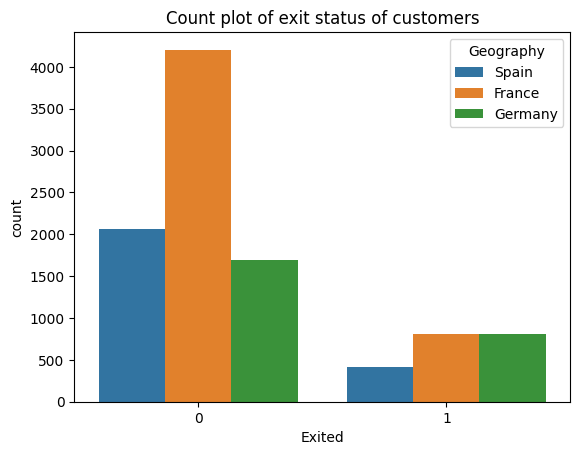

In [144]:
plt.title('Count plot of exit status of customers')
sns.countplot(x='Exited',data=df,hue='Geography')

Insight: The people from France have more stayed with the bank than from Spain and Germany.

# Converting object datatype values to numeric

In [145]:
le=LabelEncoder()
df['Geography']=le.fit_transform(df['Geography'])
le1=LabelEncoder()
df['Gender']=le1.fit_transform(df['Gender'])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,0,0,42,2.0,0.00,1,1,1,101348.880000,1
1,608.0,2,0,41,1.0,83807.86,1,0,1,112542.580000,0
2,502.0,0,0,42,8.0,159660.80,3,1,0,113931.570000,1
3,699.0,0,0,39,1.0,0.00,2,0,0,93826.630000,0
4,850.0,2,0,43,2.0,125510.82,1,1,1,100253.119978,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,0,1,39,5.0,0.00,2,1,0,96270.640000,0
9996,516.0,0,1,35,10.0,57369.61,1,1,1,101699.770000,0
9997,709.0,0,0,36,7.0,0.00,1,0,1,42085.580000,1
9998,772.0,1,1,42,3.0,75075.31,2,1,0,92888.520000,1


# Heat map

<Axes: >

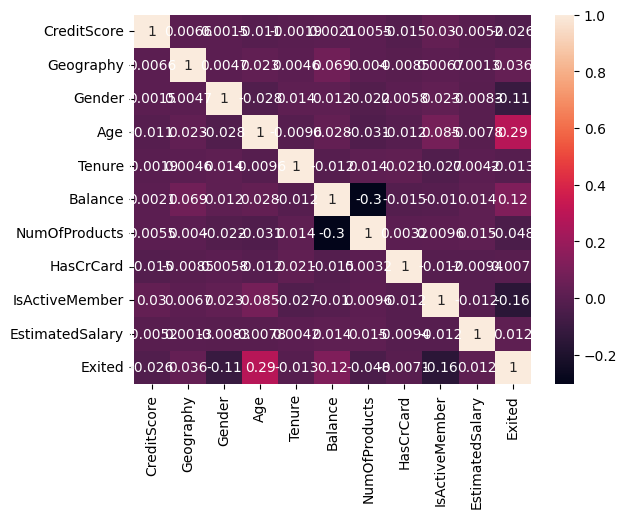

In [146]:
sns.heatmap(df.corr(),annot=True)

# Boxplot

<Axes: title={'center': 'Boxplot of exit status of customers'}, xlabel='Exited', ylabel='EstimatedSalary'>

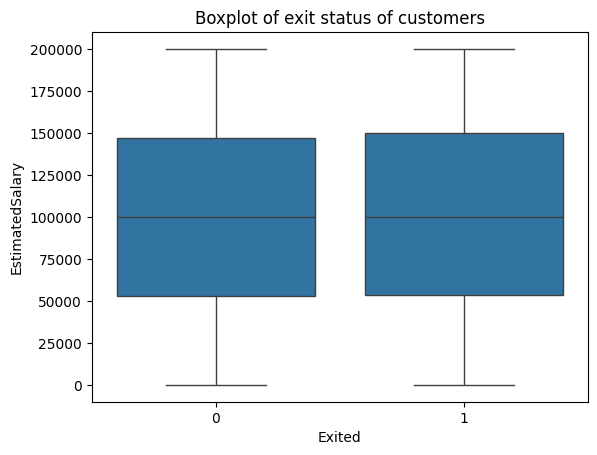

In [147]:
plt.title('Boxplot of exit status of customers')
sns.boxplot(x='Exited',y='EstimatedSalary',data=df)

Insight: Outliers are not present

# Splitting the dataset into input and output variables

In [148]:
x=df.iloc[:,:-1]
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619.0,0,0,42,2.0,0.00,1,1,1,101348.880000
1,608.0,2,0,41,1.0,83807.86,1,0,1,112542.580000
2,502.0,0,0,42,8.0,159660.80,3,1,0,113931.570000
3,699.0,0,0,39,1.0,0.00,2,0,0,93826.630000
4,850.0,2,0,43,2.0,125510.82,1,1,1,100253.119978
...,...,...,...,...,...,...,...,...,...,...
9995,771.0,0,1,39,5.0,0.00,2,1,0,96270.640000
9996,516.0,0,1,35,10.0,57369.61,1,1,1,101699.770000
9997,709.0,0,0,36,7.0,0.00,1,0,1,42085.580000
9998,772.0,1,1,42,3.0,75075.31,2,1,0,92888.520000


In [149]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [150]:
y=df.iloc[:,-1]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [151]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# Scaling the input variables to a same range

In [152]:
mms=MinMaxScaler()
x_new=mms.fit_transform(x)
x_new

array([[0.538     , 0.        , 0.        , ..., 1.        , 1.        ,
        0.50673489],
       [0.516     , 1.        , 0.        , ..., 0.        , 1.        ,
        0.56270874],
       [0.304     , 0.        , 0.        , ..., 1.        , 0.        ,
        0.56965435],
       ...,
       [0.718     , 0.        , 0.        , ..., 0.        , 1.        ,
        0.21039009],
       [0.844     , 0.5       , 1.        , ..., 1.        , 0.        ,
        0.46442905],
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.19091423]])

# Splitting the dataset into train and test datas

In [153]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.3,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7000, 10), (3000, 10), (7000,), (3000,))

# Performing classification algorithms

**KNeighbors Classifier**

Accuracy= 80.46666666666667
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2373
           1       0.56      0.29      0.38       627

    accuracy                           0.80      3000
   macro avg       0.70      0.61      0.63      3000
weighted avg       0.78      0.80      0.78      3000

ROC-AUC Score 61.366610411789736


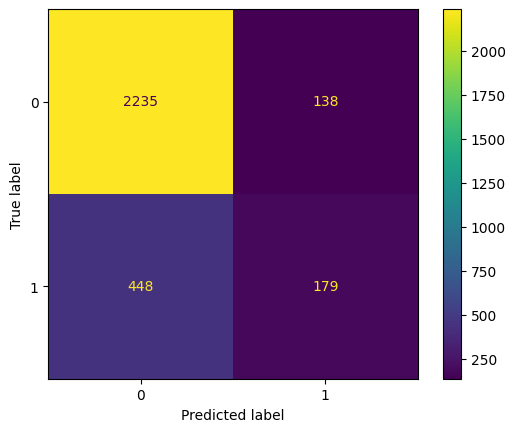

In [154]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
print("Accuracy=", accuracy_score(y_test,y_pred_knn)*100)
print(classification_report(y_test,y_pred_knn))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn))
print("ROC-AUC Score", roc_auc_score(y_test,y_pred_knn)*100)

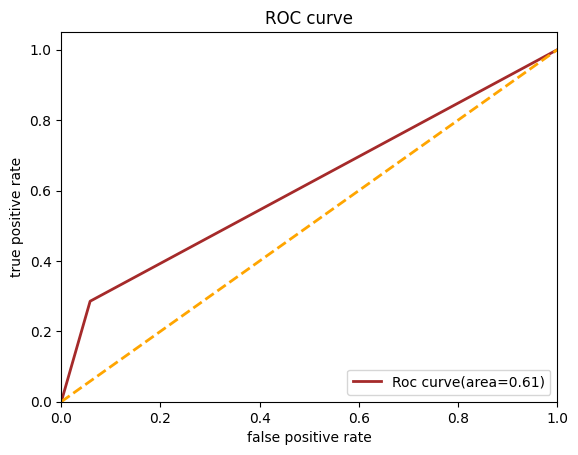

In [155]:
fpr_knn,tpr_knn,treshold=roc_curve(y_test,y_pred_knn)
auc_knn=auc(fpr_knn,tpr_knn)
plt.figure()
lw=2
plt.plot(fpr_knn,tpr_knn,color='brown',lw=lw,label='Roc curve(area=%0.2f)' %auc_knn)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

**SVC**

Accuracy= 84.46666666666667
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2373
           1       0.85      0.31      0.45       627

    accuracy                           0.84      3000
   macro avg       0.85      0.65      0.68      3000
weighted avg       0.85      0.84      0.81      3000

ROC-AUC Score 64.77517204112453


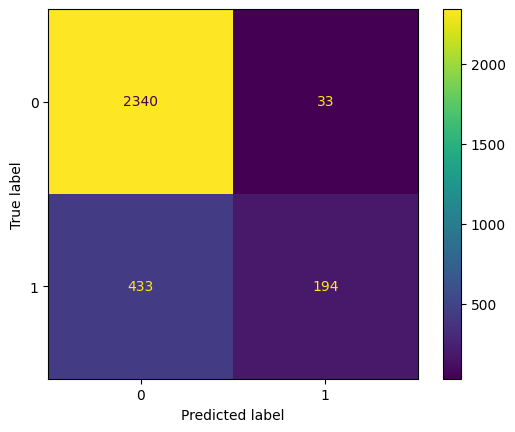

In [156]:
sv=SVC(kernel='rbf')
sv.fit(x_train,y_train)
y_pred_sv=sv.predict(x_test)
print("Accuracy=", accuracy_score(y_test,y_pred_sv)*100)
print(classification_report(y_test,y_pred_sv))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_sv))
print("ROC-AUC Score", roc_auc_score(y_test,y_pred_sv)*100)

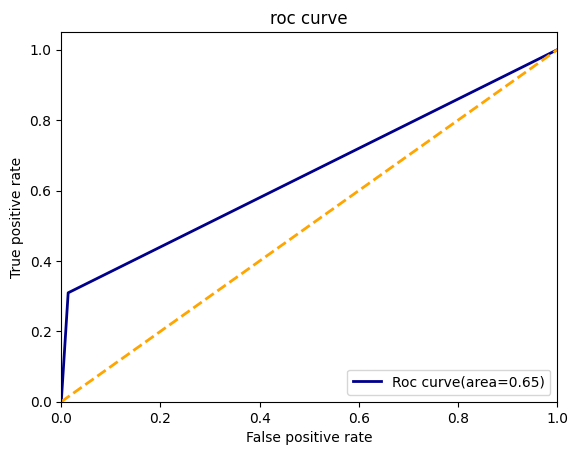

In [157]:
fpr_sv,tpr_sv,treshold=roc_curve(y_test,y_pred_sv)
auc_sv=auc(fpr_sv,tpr_sv)
plt.figure()
lw=2
plt.plot(fpr_sv,tpr_sv,color='darkblue',lw=lw,label='Roc curve(area=%0.2f)' %auc_sv)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('roc curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()

**Gaussian Naive Bayes**

Accuracy= 82.63333333333334
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2373
           1       0.82      0.22      0.34       627

    accuracy                           0.83      3000
   macro avg       0.82      0.60      0.62      3000
weighted avg       0.83      0.83      0.78      3000

ROC-AUC Score 60.213183804241076


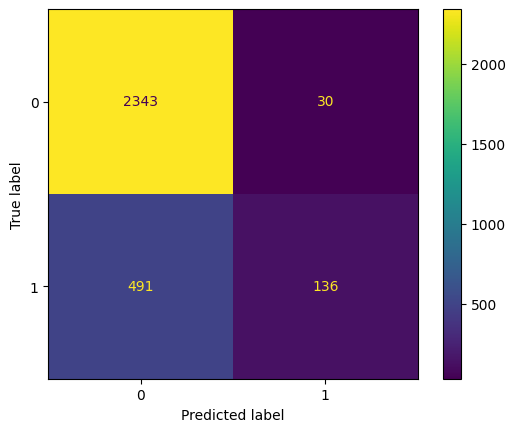

In [158]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb=gnb.predict(x_test)
print("Accuracy=", accuracy_score(y_test,y_pred_gnb)*100)
print(classification_report(y_test,y_pred_gnb))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_gnb))
print("ROC-AUC Score", roc_auc_score(y_test,y_pred_gnb)*100)

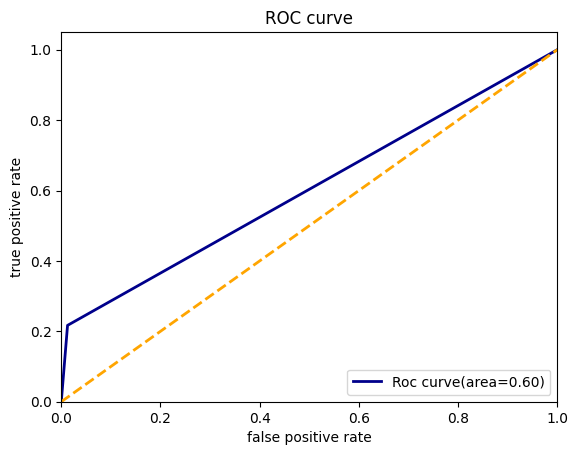

In [159]:
fpr_gnb,tpr_gnb,treshold=roc_curve(y_test,y_pred_gnb)
auc_gnb=auc(fpr_gnb,tpr_gnb)
plt.figure()
plt.plot(fpr_gnb,tpr_gnb,color='darkblue',lw=2,label='Roc curve(area=%0.2f)'%auc_gnb)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

**Decision Tree Classifier**

Accuracy= 84.56666666666666
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2373
           1       0.90      0.30      0.44       627

    accuracy                           0.85      3000
   macro avg       0.87      0.64      0.68      3000
weighted avg       0.85      0.85      0.81      3000

ROC-AUC Score 64.31031319247434


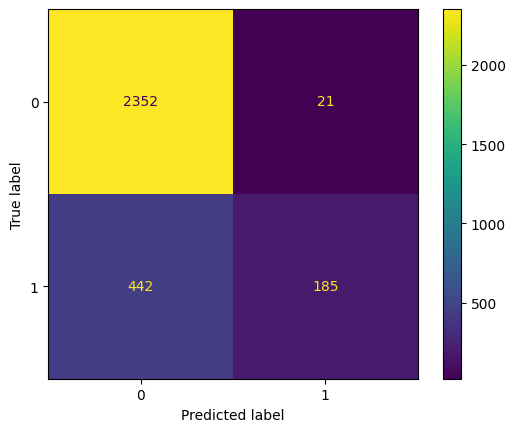

In [160]:
dtc=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=4)
dtc.fit(x_train,y_train)
y_pred_dtc=dtc.predict(x_test)
print("Accuracy=", accuracy_score(y_test,y_pred_dtc)*100)
print(classification_report(y_test,y_pred_dtc))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dtc))
print("ROC-AUC Score", roc_auc_score(y_test,y_pred_dtc)*100)

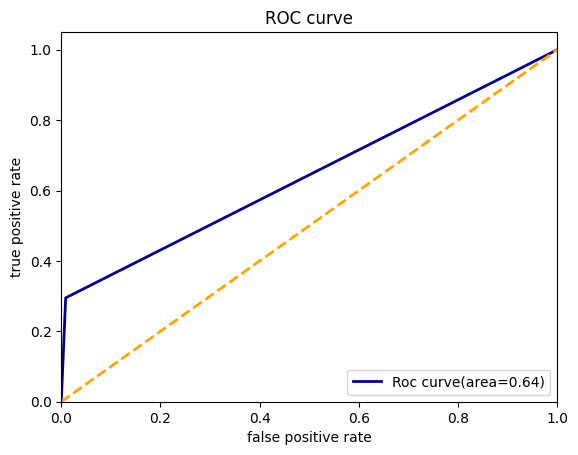

In [161]:
fpr_dtc,tpr_dtc,treshold=roc_curve(y_test,y_pred_dtc)
auc_dtc=auc(fpr_dtc,tpr_dtc)
plt.figure()
plt.plot(fpr_dtc,tpr_dtc,color='darkblue',lw=2,label='Roc curve(area=%.2f)'%auc_dtc)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

**Random Forest Classifier**

Accuracy= 84.63333333333334
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2373
           1       0.88      0.30      0.45       627

    accuracy                           0.85      3000
   macro avg       0.86      0.65      0.68      3000
weighted avg       0.85      0.85      0.81      3000

ROC-AUC Score 64.70450059178518


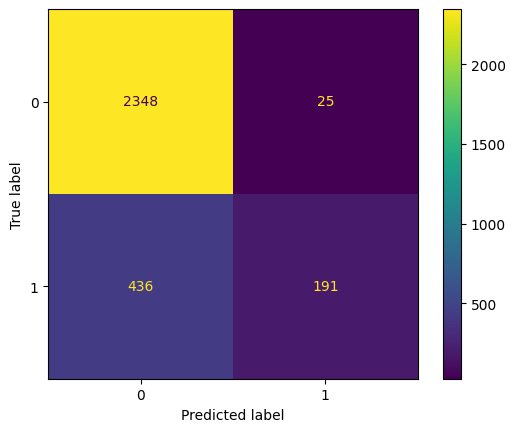

In [162]:
rfc=RandomForestClassifier(n_estimators=200,random_state=1,criterion='entropy',max_depth=4)
rfc.fit(x_train,y_train)
y_pred_rfc=rfc.predict(x_test)
print("Accuracy=", accuracy_score(y_test,y_pred_rfc)*100)
print(classification_report(y_test,y_pred_rfc))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rfc))
print("ROC-AUC Score", roc_auc_score(y_test,y_pred_rfc)*100)

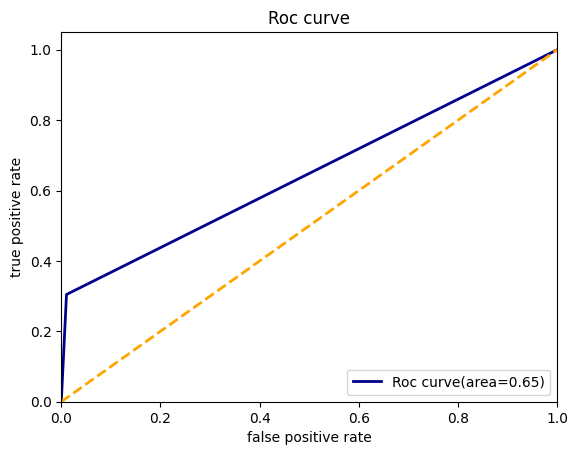

In [163]:
fpr_rfc,tpr_rfc,treshold=roc_curve(y_test,y_pred_rfc)
auc_rfc=auc(fpr_rfc,tpr_rfc)
plt.figure()
plt.plot(fpr_rfc,tpr_rfc,color='darkblue',lw=2,label='Roc curve(area=%.2f)'%auc_rfc)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('Roc curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

**AdaBoost Classifier**

Accuracy= 85.66666666666667
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2373
           1       0.75      0.47      0.58       627

    accuracy                           0.86      3000
   macro avg       0.81      0.71      0.75      3000
weighted avg       0.85      0.86      0.84      3000

ROC-AUC Score 71.40114969644546


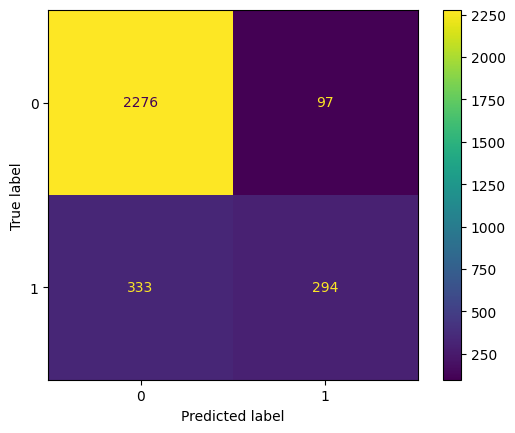

In [164]:
ad=AdaBoostClassifier(n_estimators=200,random_state=1)
ad.fit(x_train,y_train)
y_pred_ad=ad.predict(x_test)
print("Accuracy=", accuracy_score(y_test,y_pred_ad)*100)
print(classification_report(y_test,y_pred_ad))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_ad))
print("ROC-AUC Score", roc_auc_score(y_test,y_pred_ad)*100)

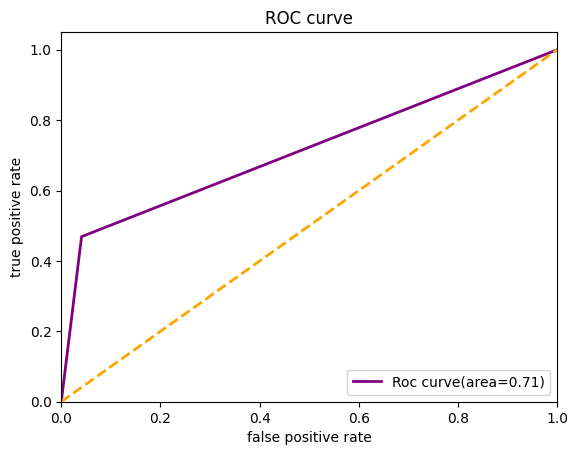

In [165]:
fpr_ad,tpr_ad,treshold=roc_curve(y_test,y_pred_ad)
auc_ad=auc(fpr_ad,tpr_ad)
plt.figure()
plt.plot(fpr_ad,tpr_ad,color='purple',lw=2,label='Roc curve(area=%.2f)'%auc_ad)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

**XGBoost Classifier**

Accuracy= 85.13333333333334
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2373
           1       0.70      0.51      0.59       627

    accuracy                           0.85      3000
   macro avg       0.79      0.73      0.75      3000
weighted avg       0.84      0.85      0.84      3000

ROC-AUC Score 72.53088473395879


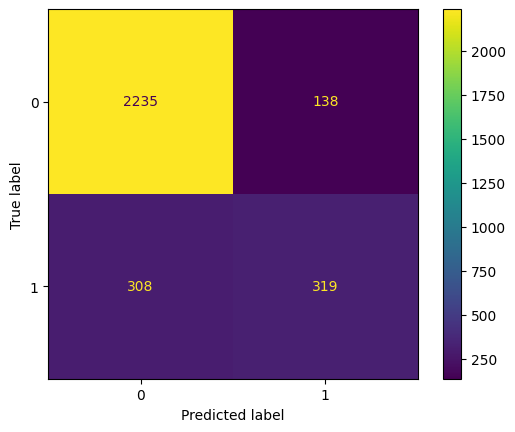

In [166]:
xgb=XGBClassifier(n_estimators=200,random_state=1)
xgb.fit(x_train,y_train)
y_pred_xgb=xgb.predict(x_test)
print("Accuracy=", accuracy_score(y_test,y_pred_xgb)*100)
print(classification_report(y_test,y_pred_xgb))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_xgb))
print("ROC-AUC Score", roc_auc_score(y_test,y_pred_xgb)*100)

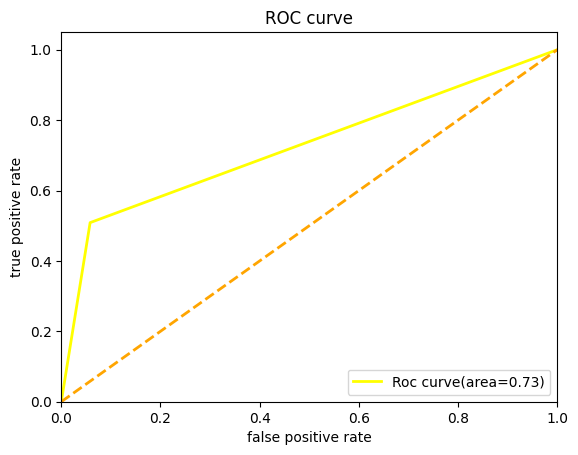

In [167]:
fpr_xgb,tpr_xgb,treshold=roc_curve(y_test,y_pred_xgb)
auc_xgb=auc(fpr_xgb,tpr_xgb)
plt.figure()
plt.plot(fpr_xgb,tpr_xgb,color='yellow',lw=2,label='Roc curve(area=%.2f)'%auc_xgb)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

# Hyperparameter Tuning

In [168]:
params_knn={'n_neighbors':[3,5,7,9],
            'weights':['uniform','distance'],
            'algorithm':['auto','ball_tree','kd_tree','brute']}
clf_knn=GridSearchCV(knn,params_knn,cv=5,scoring='accuracy')
clf_knn.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [169]:
params_sv={'kernel':['poly','linear','rbf'],
           'gamma':['scale','auto'],
           'decision_function_shape':['ovo','ovr']}
clf_sv=GridSearchCV(sv,params_sv,cv=5,scoring='accuracy')
clf_sv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'linear', 'rbf']},
             scoring='accuracy')

In [170]:
params_dtc={'criterion':['gini','entropy','log_loss'],
            'splitter':['best','random'],
            'max_depth':[4,5,6,7,8,9,10]}
clf_dtc=GridSearchCV(dtc,params_dtc,cv=5,scoring='accuracy')
clf_dtc.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                              random_state=1),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [171]:
params_rfc={'n_estimators':[50,100,150,200],
            'max_features':['sqrt','log2'],
            'class_weight':['balanced','balanced_subsample']}
clf_rfc = GridSearchCV(rfc, params_rfc, cv=5, scoring='accuracy')
clf_rfc.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=4,
                                              n_estimators=200,
                                              random_state=1),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [172]:
params_ad={'n_estimators': [50, 100, 200],
           'random_state':[1,2,3,4,5,6,7,8,9,10]}
clf_ad=GridSearchCV(ad,params_ad,cv=5,scoring='accuracy')
clf_ad.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(n_estimators=200, random_state=1),
             param_grid={'n_estimators': [50, 100, 200],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [173]:
params_xgb={'n_estimators':[50,100,200],
            'random_state':[1,2,3,4,5,6,7,8,9,10]}
clf_xgb=GridSearchCV(xgb,params_xgb,cv=5,scoring='accuracy')
clf_xgb.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...ne,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1, ...),
             param_grid={'n_estimators': [50, 100, 200],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

**Displaying the best parameters**

In [174]:
print("Best Parameters:")
print("KNeighbours Classifier:",clf_knn.best_params_)
print("SVC:",clf_sv.best_params_)
print("DecisionTree Classifier:",clf_dtc.best_params_)
print("Random Forest Classifier:",clf_rfc.best_params_)
print("AdaBoost Classifier:",clf_ad.best_params_)
print("XGB Classifier:",clf_xgb.best_params_)

Best Parameters:
KNeighbours Classifier: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}
SVC: {'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'poly'}
DecisionTree Classifier: {'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}
Random Forest Classifier: {'class_weight': 'balanced_subsample', 'max_features': 'sqrt', 'n_estimators': 100}
AdaBoost Classifier: {'n_estimators': 50, 'random_state': 1}
XGB Classifier: {'n_estimators': 50, 'random_state': 1}


**Performing classification algorithms with hyperparameter tuning**

Accuracy= 80.63333333333334
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      2373
           1       0.58      0.27      0.37       627

    accuracy                           0.81      3000
   macro avg       0.70      0.61      0.63      3000
weighted avg       0.78      0.81      0.78      3000

ROC-AUC Score 60.943892313244895


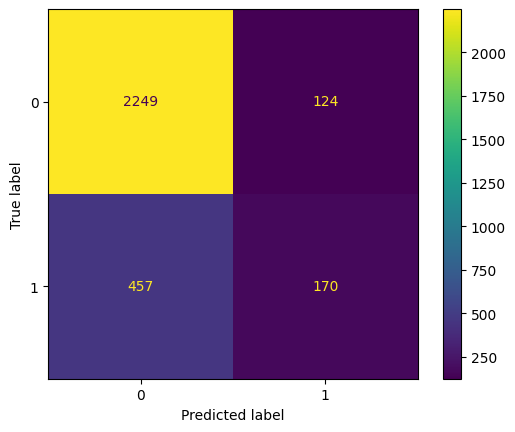

In [175]:
knn1=KNeighborsClassifier(algorithm='auto',n_neighbors=7,weights='distance')
knn1.fit(x_train,y_train)
y_pred_knn1=knn1.predict(x_test)
print("Accuracy=", accuracy_score(y_test,y_pred_knn1)*100)
print(classification_report(y_test,y_pred_knn1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn1))
print("ROC-AUC Score", roc_auc_score(y_test,y_pred_knn1)*100)

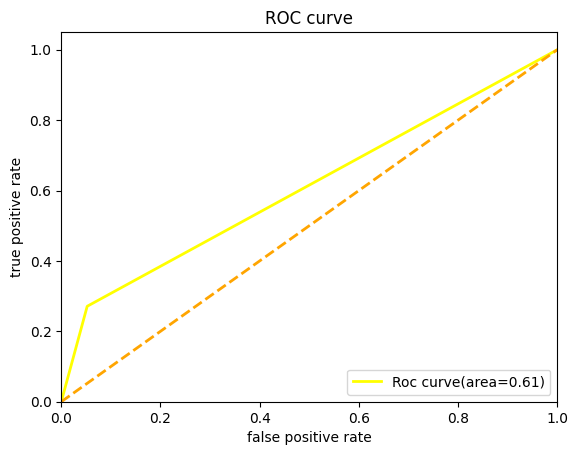

In [176]:
fpr_knn1,tpr_knn1,treshold=roc_curve(y_test,y_pred_knn1)
auc_knn1=auc(fpr_knn1,tpr_knn1)
plt.figure()
plt.plot(fpr_knn1,tpr_knn1,color='yellow',lw=2,label='Roc curve(area=%.2f)'%auc_knn1)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 85.03333333333333
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2373
           1       0.87      0.33      0.48       627

    accuracy                           0.85      3000
   macro avg       0.86      0.66      0.70      3000
weighted avg       0.85      0.85      0.82      3000

ROC-AUC Score 66.0134850400337


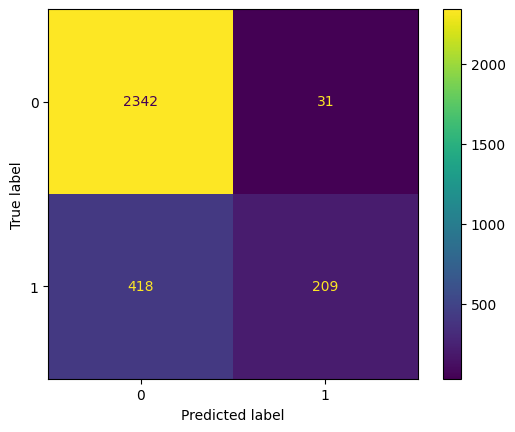

In [177]:
sv1=SVC(decision_function_shape='ovo',gamma='scale',kernel='poly')
sv1.fit(x_train,y_train)
y_pred_sv1=sv1.predict(x_test)
print("Accuracy=", accuracy_score(y_test,y_pred_sv1)*100)
print(classification_report(y_test,y_pred_sv1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_sv1))
print("ROC-AUC Score", roc_auc_score(y_test,y_pred_sv1)*100)

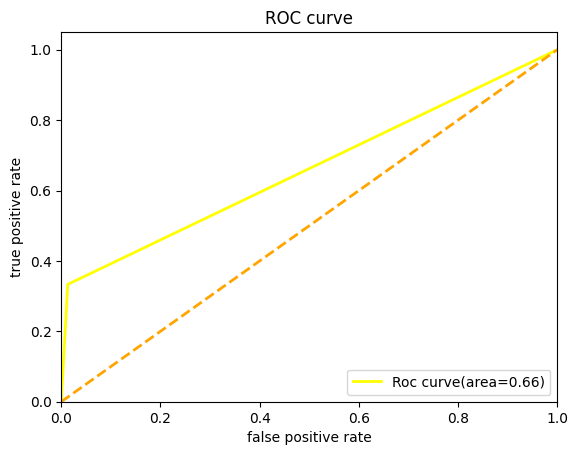

In [178]:
fpr_sv1,tpr_sv1,treshold=roc_curve(y_test,y_pred_sv1)
auc_sv1=auc(fpr_sv1,tpr_sv1)
plt.figure()
plt.plot(fpr_sv1,tpr_sv1,color='yellow',lw=2,label='Roc curve(area=%.2f)'%auc_sv1)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 85.46666666666667
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2373
           1       0.76      0.44      0.56       627

    accuracy                           0.85      3000
   macro avg       0.82      0.70      0.74      3000
weighted avg       0.85      0.85      0.84      3000

ROC-AUC Score 70.27726194004723


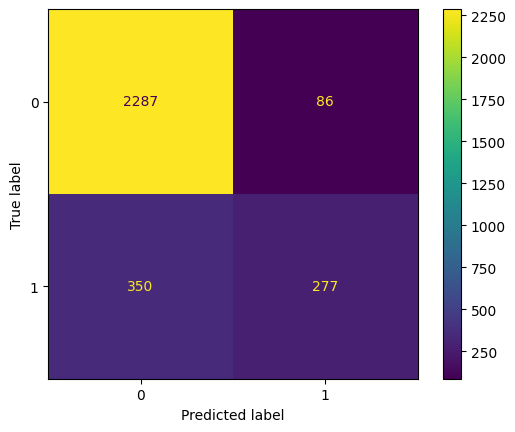

In [179]:
dtc1=DecisionTreeClassifier(criterion='entropy',max_depth=5,splitter='best')
dtc1.fit(x_train,y_train)
y_pred_dtc1=dtc1.predict(x_test)
print("Accuracy=", accuracy_score(y_test,y_pred_dtc1)*100)
print(classification_report(y_test,y_pred_dtc1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dtc1))
print("ROC-AUC Score", roc_auc_score(y_test,y_pred_dtc1)*100)

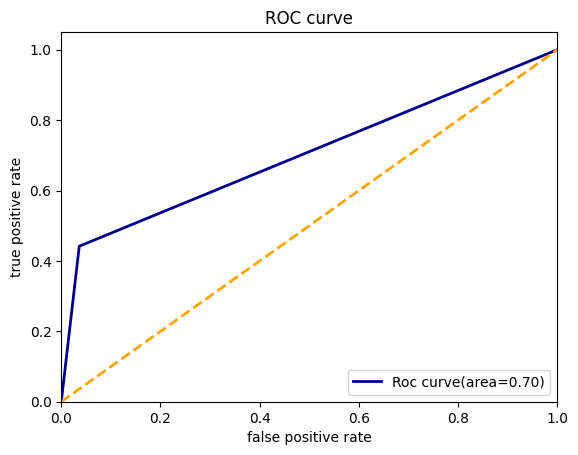

In [180]:
fpr_dtc1,tpr_dtc1,treshold=roc_curve(y_test,y_pred_dtc1)
auc_dtc1=auc(fpr_dtc1,tpr_dtc1)
plt.figure()
plt.plot(fpr_dtc1,tpr_dtc1,color='darkblue',lw=2,label='Roc curve(area=%.2f)'%auc_dtc1)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 85.86666666666667
              precision    recall  f1-score   support

           0       0.86      0.97      0.92      2373
           1       0.81      0.42      0.56       627

    accuracy                           0.86      3000
   macro avg       0.84      0.70      0.74      3000
weighted avg       0.85      0.86      0.84      3000

ROC-AUC Score 69.88468758380263


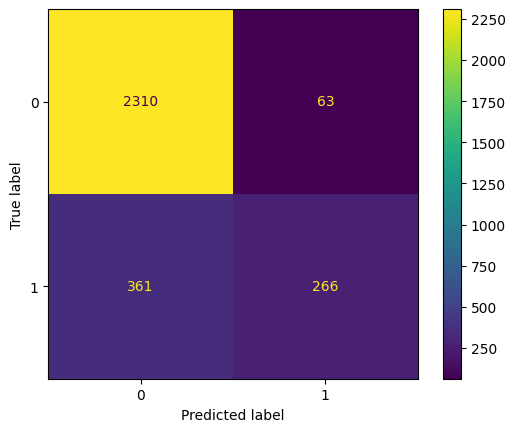

In [181]:
rfc1=RandomForestClassifier(class_weight='balanced_subsample',max_features='sqrt',n_estimators=100,random_state=1)
rfc1.fit(x_train,y_train)
y_pred_rfc1=rfc1.predict(x_test)
print("Accuracy=", accuracy_score(y_test,y_pred_rfc1)*100)
print(classification_report(y_test,y_pred_rfc1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rfc1))
print("ROC-AUC Score", roc_auc_score(y_test,y_pred_rfc1)*100)

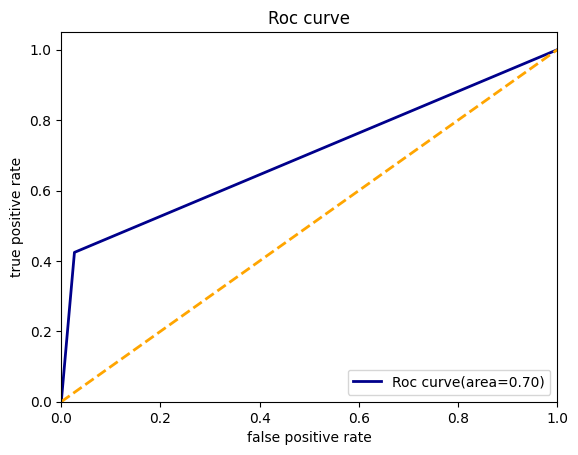

In [182]:
fpr_rfc1,tpr_rfc1,treshold=roc_curve(y_test,y_pred_rfc1)
auc_rfc1=auc(fpr_rfc1,tpr_rfc1)
plt.figure()
plt.plot(fpr_rfc1,tpr_rfc1,color='darkblue',lw=2,label='Roc curve(area=%.2f)'%auc_rfc1)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('Roc curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 85.5
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2373
           1       0.74      0.47      0.58       627

    accuracy                           0.85      3000
   macro avg       0.81      0.71      0.74      3000
weighted avg       0.84      0.85      0.84      3000

ROC-AUC Score 71.35447226271633


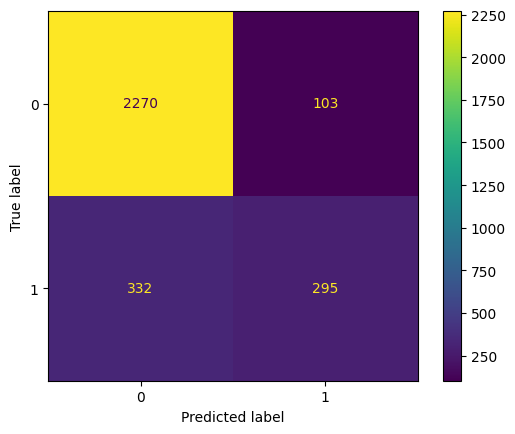

In [183]:
ad1=AdaBoostClassifier(n_estimators=50,random_state=1)
ad1.fit(x_train,y_train)
y_pred_ad1=ad1.predict(x_test)
print("Accuracy=", accuracy_score(y_test,y_pred_ad1)*100)
print(classification_report(y_test,y_pred_ad1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_ad1))
print("ROC-AUC Score", roc_auc_score(y_test,y_pred_ad1)*100)

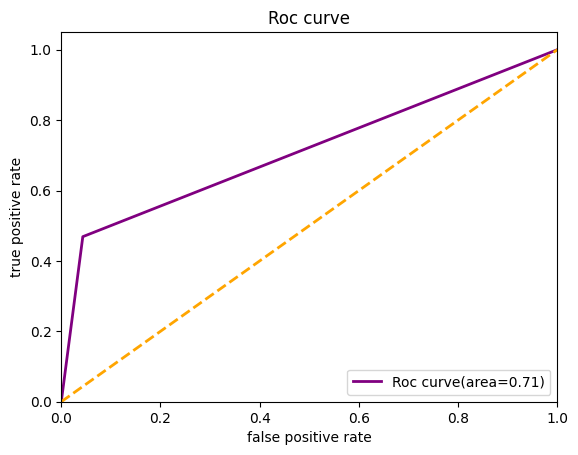

In [184]:
fpr_ad1,tpr_ad1,treshold=roc_curve(y_test,y_pred_ad1)
auc_ad1=auc(fpr_ad1,tpr_ad1)
plt.figure()
plt.plot(fpr_ad1,tpr_ad,color='purple',lw=2,label='Roc curve(area=%.2f)'%auc_ad1)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('Roc curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 85.93333333333332
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2373
           1       0.74      0.50      0.60       627

    accuracy                           0.86      3000
   macro avg       0.81      0.73      0.76      3000
weighted avg       0.85      0.86      0.85      3000

ROC-AUC Score 72.68452708601754


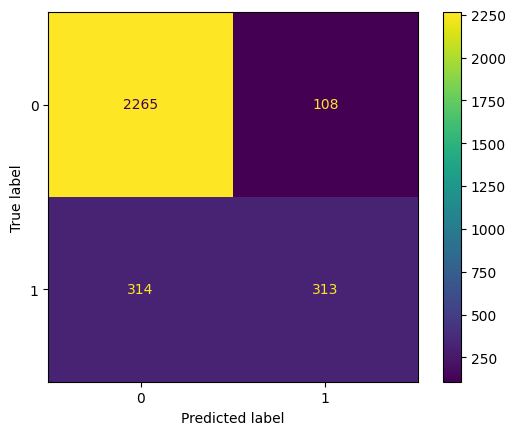

In [185]:
xgb1=XGBClassifier(n_estimators=50, random_state=1)
xgb1.fit(x_train,y_train)
y_pred_xgb1=xgb1.predict(x_test)
print("Accuracy=", accuracy_score(y_test,y_pred_xgb1)*100)
print(classification_report(y_test,y_pred_xgb1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_xgb1))
print("ROC-AUC Score", roc_auc_score(y_test,y_pred_xgb1)*100)

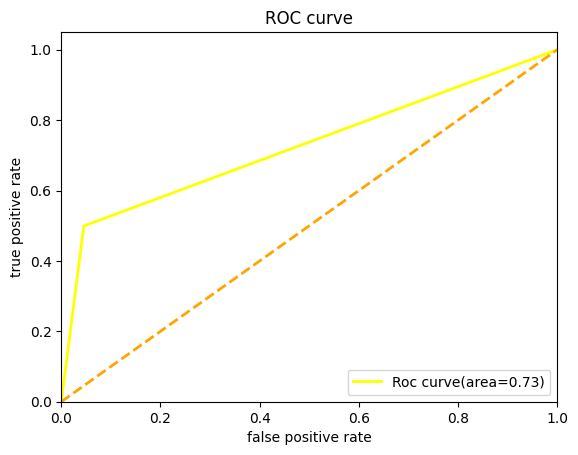

In [186]:
fpr_xgb1,tpr_xgb1,treshold=roc_curve(y_test,y_pred_xgb1)
auc_xgb1=auc(fpr_xgb1,tpr_xgb1)
plt.figure()
plt.plot(fpr_xgb1,tpr_xgb1,color='yellow',lw=2,label='Roc curve(area=%.2f)'%auc_xgb1)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

# Checking if the values are imbalanced

In [187]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

The datas are imbalanced

# Performing oversampling

In [188]:
os=SMOTE(random_state=1)
x_os,y_os=os.fit_resample(x,y)

In [189]:
y_os.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

# Scaling the input variables to a same range

In [190]:
mms_os=MinMaxScaler()
x_new_os=mms_os.fit_transform(x_os,y_os)
x_new_os

array([[0.538     , 0.        , 0.        , ..., 1.        , 1.        ,
        0.50673489],
       [0.516     , 1.        , 0.        , ..., 0.        , 1.        ,
        0.56270874],
       [0.304     , 0.        , 0.        , ..., 1.        , 0.        ,
        0.56965435],
       ...,
       [0.6745603 , 0.5       , 0.        , ..., 1.        , 0.        ,
        0.60865931],
       [0.42003479, 0.5       , 0.        , ..., 1.        , 0.        ,
        0.50116789],
       [0.44234936, 0.        , 0.        , ..., 0.        , 0.        ,
        0.05191753]])

# Splitting the dataset into train and test datas

In [191]:
x_train_os,x_test_os,y_train_os,y_test_os=train_test_split(x_new_os,y_os,random_state=1,test_size=0.3)
x_train_os.shape,x_test_os.shape,y_train_os.shape,y_test_os.shape

((11148, 10), (4778, 10), (11148,), (4778,))

# Performing classification algorithms without hyperparameter tuning

Accuracy= 81.24738384261198
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2322
           1       0.81      0.83      0.82      2456

    accuracy                           0.81      4778
   macro avg       0.81      0.81      0.81      4778
weighted avg       0.81      0.81      0.81      4778

ROC-AUC Score 81.19620216762479


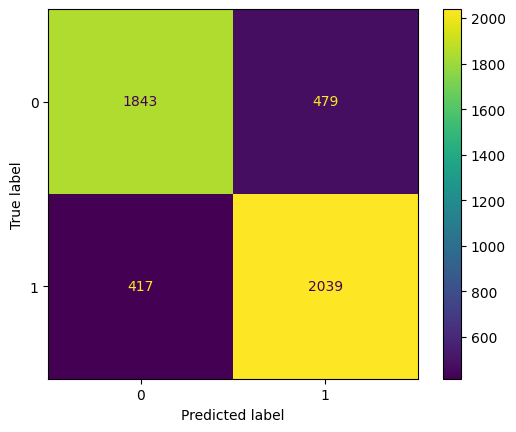

In [192]:
knn_os=KNeighborsClassifier(n_neighbors=5)
knn_os.fit(x_train_os,y_train_os)
y_pred_knn_os=knn_os.predict(x_test_os)
print("Accuracy=", accuracy_score(y_test_os,y_pred_knn_os)*100)
print(classification_report(y_test_os,y_pred_knn_os))
print(ConfusionMatrixDisplay.from_predictions(y_test_os,y_pred_knn_os))
print("ROC-AUC Score", roc_auc_score(y_test_os,y_pred_knn_os)*100)

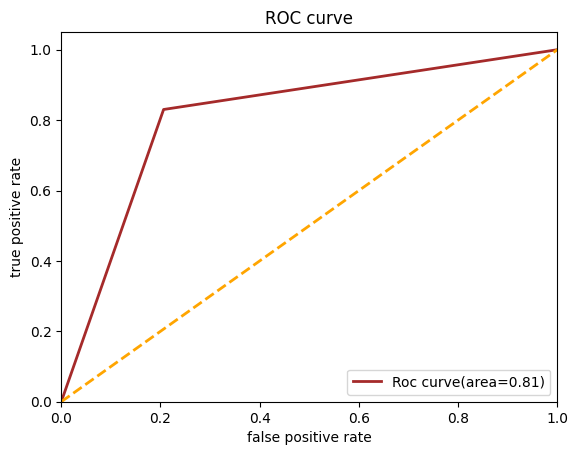

In [193]:
fpr_knn_os,tpr_knn_os,treshold=roc_curve(y_test_os,y_pred_knn_os)
auc_knn_os=auc(fpr_knn_os,tpr_knn_os)
plt.figure()
lw=2
plt.plot(fpr_knn_os,tpr_knn_os,color='brown',lw=lw,label='Roc curve(area=%0.2f)' %auc_knn_os)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 82.21012976140645
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      2322
           1       0.84      0.81      0.82      2456

    accuracy                           0.82      4778
   macro avg       0.82      0.82      0.82      4778
weighted avg       0.82      0.82      0.82      4778

ROC-AUC Score 82.2384211914361


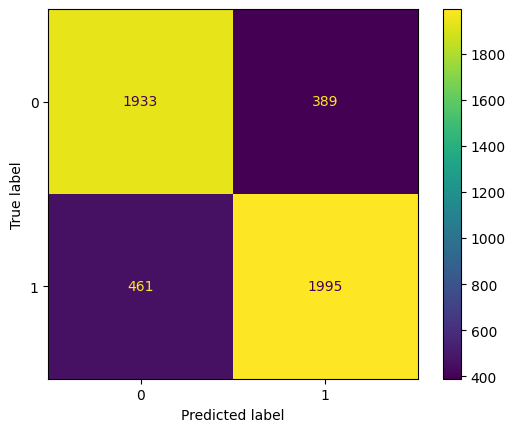

In [194]:
sv_os=SVC(kernel='rbf')
sv_os.fit(x_train_os,y_train_os)
y_pred_sv_os=sv_os.predict(x_test_os)
print("Accuracy=", accuracy_score(y_test_os,y_pred_sv_os)*100)
print(classification_report(y_test_os,y_pred_sv_os))
print(ConfusionMatrixDisplay.from_predictions(y_test_os,y_pred_sv_os))
print("ROC-AUC Score", roc_auc_score(y_test_os,y_pred_sv_os)*100)

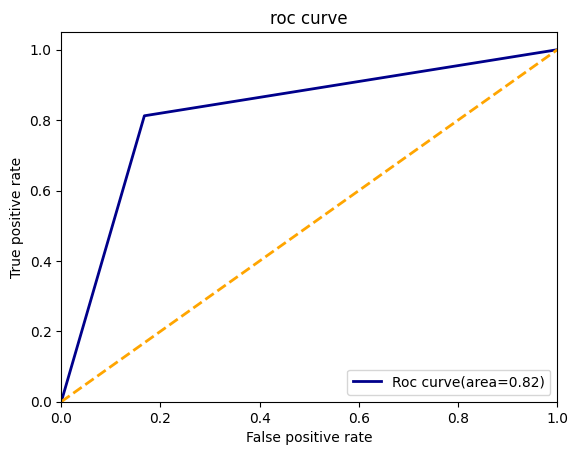

In [195]:
fpr_sv_os,tpr_sv_os,treshold=roc_curve(y_test_os,y_pred_sv_os)
auc_sv_os=auc(fpr_sv_os,tpr_sv_os)
plt.figure()
lw=2
plt.plot(fpr_sv_os,tpr_sv_os,color='darkblue',lw=lw,label='Roc curve(area=%0.2f)' %auc_sv_os)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('roc curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 79.34282126412725
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      2322
           1       0.80      0.80      0.80      2456

    accuracy                           0.79      4778
   macro avg       0.79      0.79      0.79      4778
weighted avg       0.79      0.79      0.79      4778

ROC-AUC Score 79.32949804588316


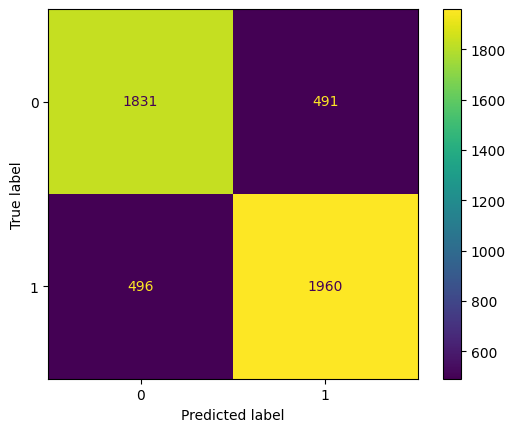

In [196]:
gnb_os=GaussianNB()
gnb_os.fit(x_train_os,y_train_os)
y_pred_gnb_os=gnb_os.predict(x_test_os)
print("Accuracy=", accuracy_score(y_test_os,y_pred_gnb_os)*100)
print(classification_report(y_test_os,y_pred_gnb_os))
print(ConfusionMatrixDisplay.from_predictions(y_test_os,y_pred_gnb_os))
print("ROC-AUC Score", roc_auc_score(y_test_os,y_pred_gnb_os)*100)

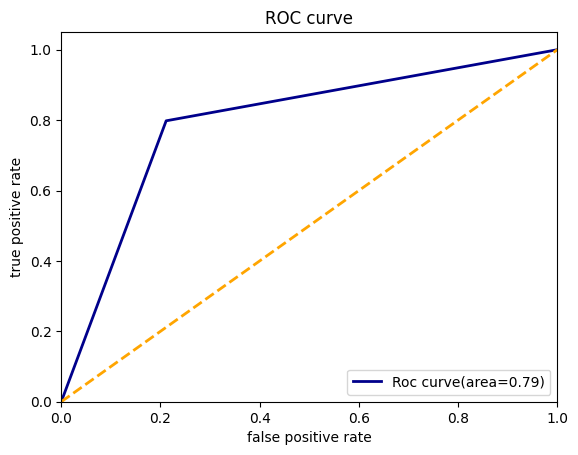

In [197]:
fpr_gnb_os,tpr_gnb_os,treshold=roc_curve(y_test_os,y_pred_gnb_os)
auc_gnb_os=auc(fpr_gnb_os,tpr_gnb_os)
plt.figure()
plt.plot(fpr_gnb_os,tpr_gnb_os,color='darkblue',lw=2,label='Roc curve(area=%0.2f)'%auc_gnb_os)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 78.44286312264546
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      2322
           1       0.77      0.82      0.80      2456

    accuracy                           0.78      4778
   macro avg       0.79      0.78      0.78      4778
weighted avg       0.79      0.78      0.78      4778

ROC-AUC Score 78.32720655281446


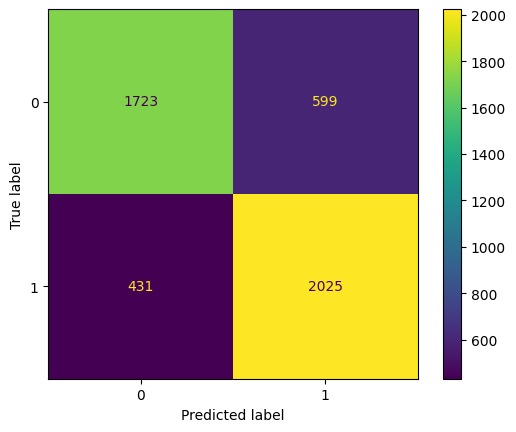

In [198]:
dtc_os=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=4)
dtc_os.fit(x_train_os,y_train_os)
y_pred_dtc_os=dtc_os.predict(x_test_os)
print("Accuracy=", accuracy_score(y_test_os,y_pred_dtc_os)*100)
print(classification_report(y_test_os,y_pred_dtc_os))
print(ConfusionMatrixDisplay.from_predictions(y_test_os,y_pred_dtc_os))
print("ROC-AUC Score", roc_auc_score(y_test_os,y_pred_dtc_os)*100)

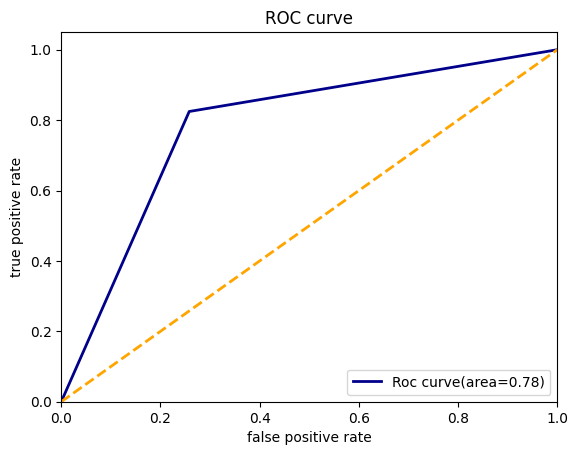

In [199]:
fpr_dtc_os,tpr_dtc_os,treshold=roc_curve(y_test_os,y_pred_dtc_os)
auc_dtc_os=auc(fpr_dtc_os,tpr_dtc_os)
plt.figure()
plt.plot(fpr_dtc_os,tpr_dtc_os,color='darkblue',lw=2,label='Roc curve(area=%0.2f)'%auc_dtc_os)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 81.37295939723734
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      2322
           1       0.83      0.80      0.81      2456

    accuracy                           0.81      4778
   macro avg       0.81      0.81      0.81      4778
weighted avg       0.81      0.81      0.81      4778

ROC-AUC Score 81.41938952436264


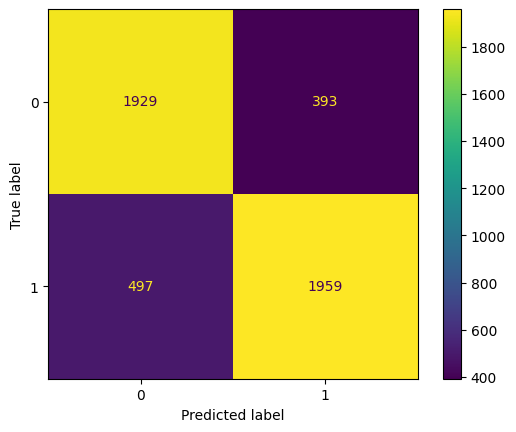

In [200]:
rfc_os=RandomForestClassifier(n_estimators=200,random_state=1,criterion='entropy',max_depth=4)
rfc_os.fit(x_train_os,y_train_os)
y_pred_rfc_os=rfc_os.predict(x_test_os)
print("Accuracy=", accuracy_score(y_test_os,y_pred_rfc_os)*100)
print(classification_report(y_test_os,y_pred_rfc_os))
print(ConfusionMatrixDisplay.from_predictions(y_test_os,y_pred_rfc_os))
print("ROC-AUC Score", roc_auc_score(y_test_os,y_pred_rfc_os)*100)

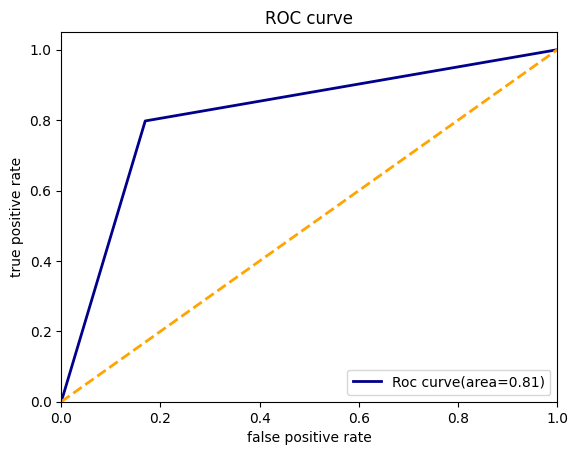

In [201]:
fpr_rfc_os,tpr_rfc_os,treshold=roc_curve(y_test_os,y_pred_rfc_os)
auc_rfc_os=auc(fpr_rfc_os,tpr_rfc_os)
plt.figure()
plt.plot(fpr_rfc_os,tpr_rfc_os,color='darkblue',lw=2,label='Roc curve(area=%0.2f)'%auc_rfc_os)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 87.98660527417329
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      2322
           1       0.89      0.88      0.88      2456

    accuracy                           0.88      4778
   macro avg       0.88      0.88      0.88      4778
weighted avg       0.88      0.88      0.88      4778

ROC-AUC Score 87.98889744604085


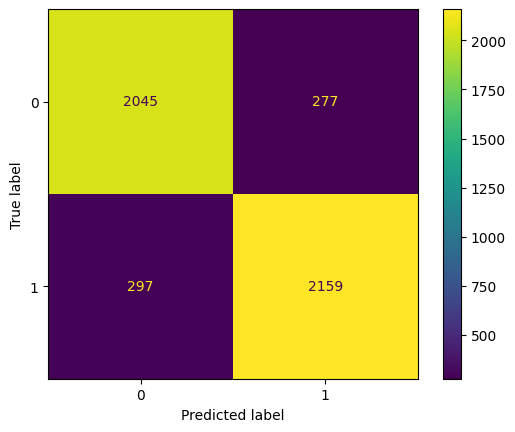

In [202]:
ad_os=AdaBoostClassifier(n_estimators=200,random_state=1)
ad_os.fit(x_train_os,y_train_os)
y_pred_ad_os=ad_os.predict(x_test_os)
print("Accuracy=", accuracy_score(y_test_os,y_pred_ad_os)*100)
print(classification_report(y_test_os,y_pred_ad_os))
print(ConfusionMatrixDisplay.from_predictions(y_test_os,y_pred_ad_os))
print("ROC-AUC Score", roc_auc_score(y_test_os,y_pred_ad_os)*100)

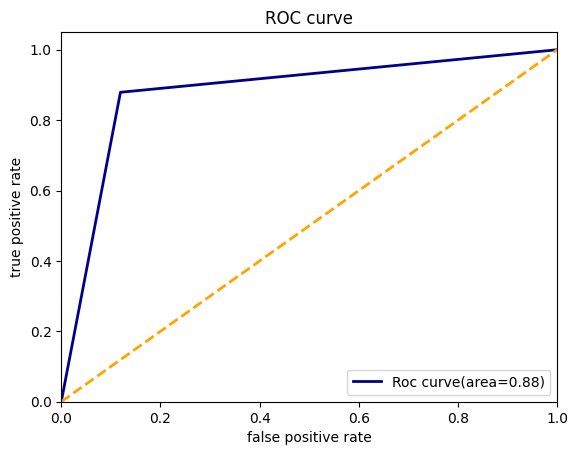

In [203]:
fpr_ad_os,tpr_ad_os,treshold=roc_curve(y_test_os,y_pred_ad_os)
auc_ad_os=auc(fpr_ad_os,tpr_ad_os)
plt.figure()
plt.plot(fpr_ad_os,tpr_ad_os,color='darkblue',lw=2,label='Roc curve(area=%0.2f)'%auc_ad_os)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 88.94935119296777
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2322
           1       0.91      0.87      0.89      2456

    accuracy                           0.89      4778
   macro avg       0.89      0.89      0.89      4778
weighted avg       0.89      0.89      0.89      4778

ROC-AUC Score 88.99822053323683


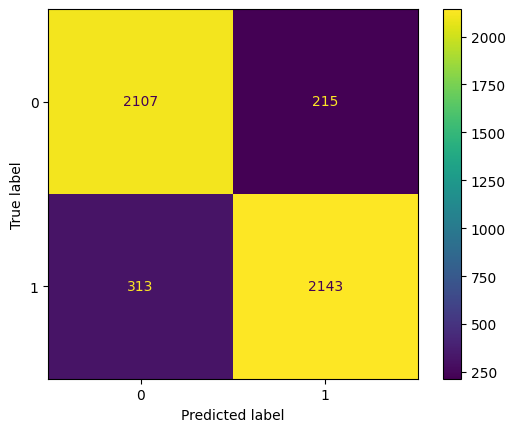

In [204]:
xgb_os=XGBClassifier(n_estimators=200,random_state=1)
xgb_os.fit(x_train_os,y_train_os)
y_pred_xgb_os=xgb_os.predict(x_test_os)
print("Accuracy=", accuracy_score(y_test_os,y_pred_xgb_os)*100)
print(classification_report(y_test_os,y_pred_xgb_os))
print(ConfusionMatrixDisplay.from_predictions(y_test_os,y_pred_xgb_os))
print("ROC-AUC Score", roc_auc_score(y_test_os,y_pred_xgb_os)*100)

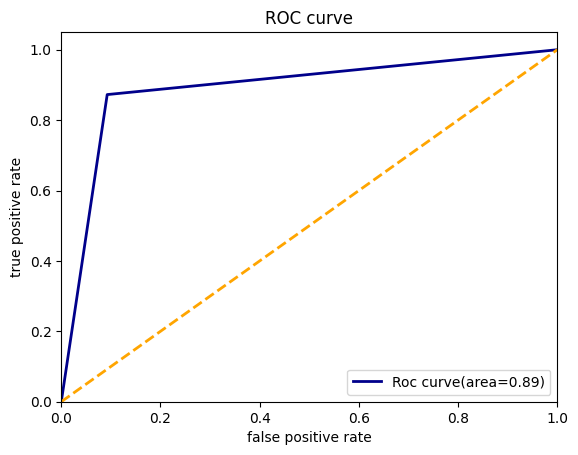

In [205]:
fpr_xgb_os,tpr_xgb_os,treshold=roc_curve(y_test_os,y_pred_xgb_os)
auc_xgb_os=auc(fpr_xgb_os,tpr_xgb_os)
plt.figure()
plt.plot(fpr_xgb_os,tpr_xgb_os,color='darkblue',lw=2,label='Roc curve(area=%0.2f)'%auc_xgb_os)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

# Hperparameter Tuning

In [206]:
params_knn_os={'n_neighbors':[3,5,7,9],
            'weights':['uniform','distance'],
            'algorithm':['auto','ball_tree','kd_tree','brute']}
clf_knn_os=GridSearchCV(knn_os,params_knn_os,cv=5,scoring='accuracy')
clf_knn_os.fit(x_train_os,y_train_os)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [207]:
params_sv_os={'kernel':['poly','linear','rbf'],
           'gamma':['scale','auto'],
           'decision_function_shape':['ovo','ovr']}
clf_sv_os=GridSearchCV(sv_os,params_sv_os,cv=5,scoring='accuracy')
clf_sv_os.fit(x_train_os,y_train_os)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'linear', 'rbf']},
             scoring='accuracy')

In [208]:
params_dtc_os={'criterion':['gini','entropy','log_loss'],
            'splitter':['best','random'],
            'max_depth':[4,5,6,7,8,9,10]}
clf_dtc_os=GridSearchCV(dtc_os,params_dtc_os,cv=5,scoring='accuracy')
clf_dtc_os.fit(x_train_os,y_train_os)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                              random_state=1),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [209]:
params_rfc_os={'n_estimators':[50,100,150,200],
            'max_features':['sqrt','log2'],
            'class_weight':['balanced','balanced_subsample']}
clf_rfc_os = GridSearchCV(rfc_os, params_rfc_os, cv=5, scoring='accuracy')
clf_rfc_os.fit(x_train_os, y_train_os)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=4,
                                              n_estimators=200,
                                              random_state=1),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [210]:
params_ad_os={'n_estimators': [50, 100, 200],
           'random_state':[1,2,3,4,5,6,7,8,9,10]}
clf_ad_os=GridSearchCV(ad_os,params_ad_os,cv=5,scoring='accuracy')
clf_ad_os.fit(x_train_os,y_train_os)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(n_estimators=200, random_state=1),
             param_grid={'n_estimators': [50, 100, 200],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [211]:
params_xgb_os={'n_estimators':[50,100,200],
            'random_state':[1,2,3,4,5,6,7,8,9,10]}
clf_xgb_os=GridSearchCV(xgb_os,params_xgb_os,cv=5,scoring='accuracy')
clf_xgb_os.fit(x_train_os,y_train_os)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...ne,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1, ...),
             param_grid={'n_estimators': [50, 100, 200],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

Displaying the best parameters

In [212]:
print("Best Parameters:")
print("KNeighbours Classifier:",clf_knn_os.best_params_)
print("SVC:",clf_sv_os.best_params_)
print("DecisionTree Classifier:",clf_dtc_os.best_params_)
print("Random Forest Classifier:",clf_rfc_os.best_params_)
print("AdaBoost Classifier:",clf_ad_os.best_params_)
print("XGB Classifier:",clf_xgb_os.best_params_)

Best Parameters:
KNeighbours Classifier: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
SVC: {'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}
DecisionTree Classifier: {'criterion': 'entropy', 'max_depth': 10, 'splitter': 'random'}
Random Forest Classifier: {'class_weight': 'balanced_subsample', 'max_features': 'sqrt', 'n_estimators': 100}
AdaBoost Classifier: {'n_estimators': 200, 'random_state': 1}
XGB Classifier: {'n_estimators': 50, 'random_state': 1}


# Performing classification algorithms after hyperparameter tuning

Accuracy= 82.23105902051067
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2322
           1       0.81      0.85      0.83      2456

    accuracy                           0.82      4778
   macro avg       0.82      0.82      0.82      4778
weighted avg       0.82      0.82      0.82      4778

ROC-AUC Score 82.150692848746


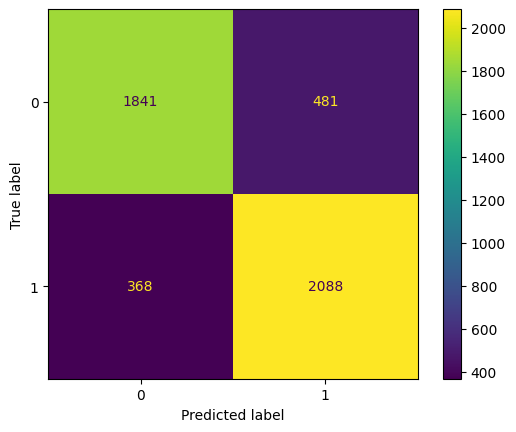

In [213]:
knn1_os=KNeighborsClassifier(algorithm='auto',n_neighbors=9,weights='distance')
knn1_os.fit(x_train_os,y_train_os)
y_pred_knn1_os=knn1_os.predict(x_test_os)
print("Accuracy=", accuracy_score(y_test_os,y_pred_knn1_os)*100)
print(classification_report(y_test_os,y_pred_knn1_os))
print(ConfusionMatrixDisplay.from_predictions(y_test_os,y_pred_knn1_os))
print("ROC-AUC Score", roc_auc_score(y_test_os,y_pred_knn1_os)*100)

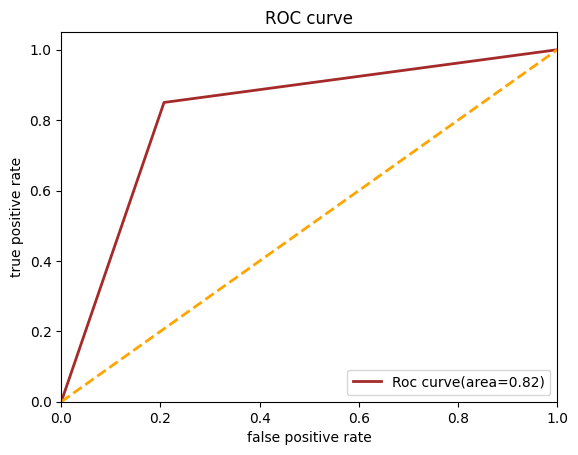

In [214]:
fpr_knn1_os,tpr_knn1_os,treshold=roc_curve(y_test_os,y_pred_knn1_os)
auc_knn1_os=auc(fpr_knn1_os,tpr_knn1_os)
plt.figure()
lw=2
plt.plot(fpr_knn1_os,tpr_knn1_os,color='brown',lw=lw,label='Roc curve(area=%0.2f)' %auc_knn1_os)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 82.21012976140645
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      2322
           1       0.84      0.81      0.82      2456

    accuracy                           0.82      4778
   macro avg       0.82      0.82      0.82      4778
weighted avg       0.82      0.82      0.82      4778

ROC-AUC Score 82.2384211914361


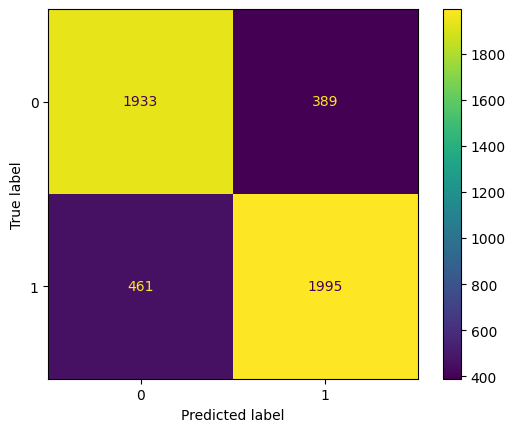

In [215]:
sv1_os=SVC(decision_function_shape='ovo',gamma='scale',kernel='rbf')
sv1_os.fit(x_train_os,y_train_os)
y_pred_sv1_os=sv1_os.predict(x_test_os)
print("Accuracy=", accuracy_score(y_test_os,y_pred_sv1_os)*100)
print(classification_report(y_test_os,y_pred_sv1_os))
print(ConfusionMatrixDisplay.from_predictions(y_test_os,y_pred_sv1_os))
print("ROC-AUC Score", roc_auc_score(y_test_os,y_pred_sv1_os)*100)

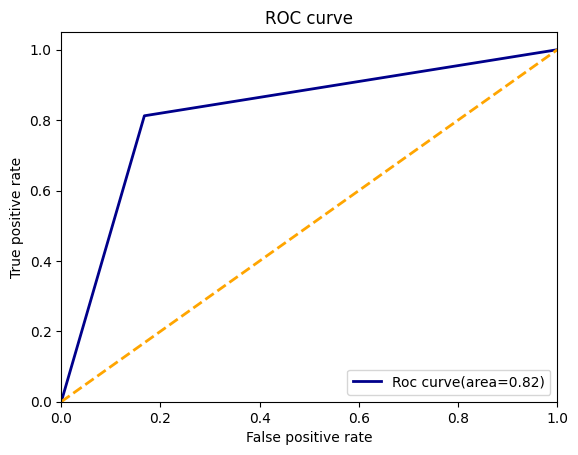

In [216]:
fpr_sv1_os,tpr_sv1_os,treshold=roc_curve(y_test_os,y_pred_sv1_os)
auc_sv1_os=auc(fpr_sv1_os,tpr_sv1_os)
plt.figure()
lw=2
plt.plot(fpr_sv1_os,tpr_sv1_os,color='darkblue',lw=lw,label='Roc curve(area=%0.2f)' %auc_sv1_os)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 81.89619087484303
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2322
           1       0.82      0.84      0.83      2456

    accuracy                           0.82      4778
   macro avg       0.82      0.82      0.82      4778
weighted avg       0.82      0.82      0.82      4778

ROC-AUC Score 81.84493248266827


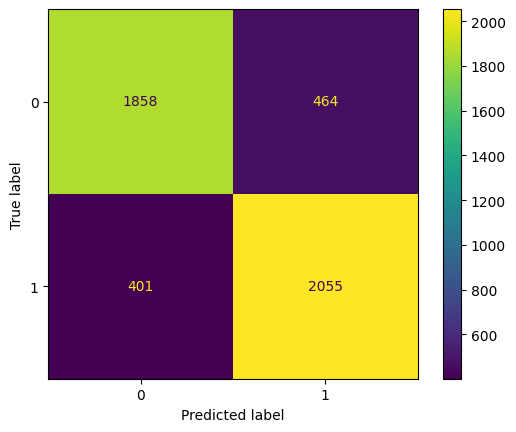

In [217]:
dtc1_os=DecisionTreeClassifier(criterion='entropy',max_depth=10,splitter='random')
dtc1_os.fit(x_train_os,y_train_os)
y_pred_dtc1_os=dtc1_os.predict(x_test_os)
print("Accuracy=", accuracy_score(y_test_os,y_pred_dtc1_os)*100)
print(classification_report(y_test_os,y_pred_dtc1_os))
print(ConfusionMatrixDisplay.from_predictions(y_test_os,y_pred_dtc1_os))
print("ROC-AUC Score", roc_auc_score(y_test_os,y_pred_dtc1_os)*100)

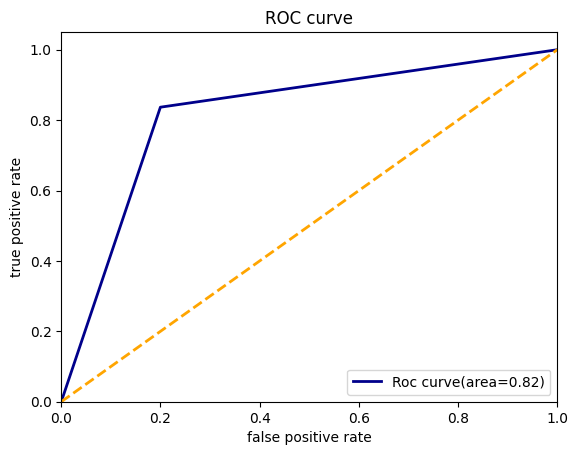

In [218]:
fpr_dtc1_os,tpr_dtc1_os,treshold=roc_curve(y_test_os,y_pred_dtc1_os)
auc_dtc1_os=auc(fpr_dtc1_os,tpr_dtc1_os)
plt.figure()
plt.plot(fpr_dtc1_os,tpr_dtc1_os,color='darkblue',lw=2,label='Roc curve(area=%0.2f)'%auc_dtc1_os)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 86.3331938049393
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2322
           1       0.87      0.87      0.87      2456

    accuracy                           0.86      4778
   macro avg       0.86      0.86      0.86      4778
weighted avg       0.86      0.86      0.86      4778

ROC-AUC Score 86.3230233680389


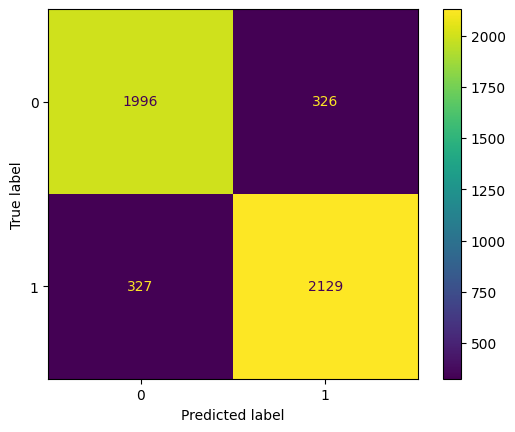

In [219]:
rfc1_os=RandomForestClassifier(class_weight='balanced_subsample',max_features='sqrt',n_estimators=100,random_state=1)
rfc1_os.fit(x_train_os,y_train_os)
y_pred_rfc1_os=rfc1_os.predict(x_test_os)
print("Accuracy=", accuracy_score(y_test_os,y_pred_rfc1_os)*100)
print(classification_report(y_test_os,y_pred_rfc1_os))
print(ConfusionMatrixDisplay.from_predictions(y_test_os,y_pred_rfc1_os))
print("ROC-AUC Score", roc_auc_score(y_test_os,y_pred_rfc1_os)*100)

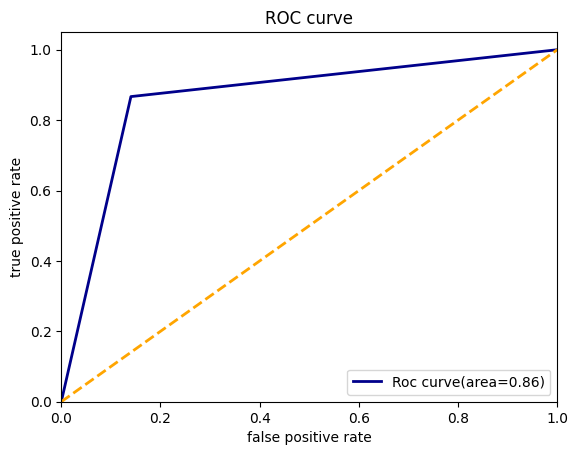

In [220]:
fpr_rfc1_os,tpr_rfc1_os,treshold=roc_curve(y_test_os,y_pred_rfc1_os)
auc_rfc1_os=auc(fpr_rfc1_os,tpr_rfc1_os)
plt.figure()
plt.plot(fpr_rfc1_os,tpr_rfc1_os,color='darkblue',lw=2,label='Roc curve(area=%0.2f)'%auc_rfc1_os)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 89.07492674759312
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2322
           1       0.91      0.87      0.89      2456

    accuracy                           0.89      4778
   macro avg       0.89      0.89      0.89      4778
weighted avg       0.89      0.89      0.89      4778

ROC-AUC Score 89.12389493500771


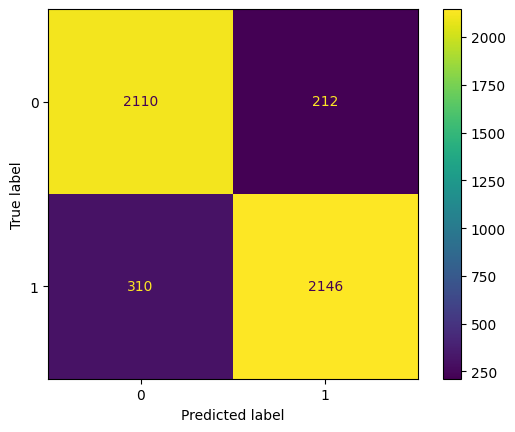

In [221]:
xgb1_os=XGBClassifier(n_estimators=50, random_state=1)
xgb1_os.fit(x_train_os,y_train_os)
y_pred_xgb1_os=xgb1_os.predict(x_test_os)
print("Accuracy=", accuracy_score(y_test_os,y_pred_xgb1_os)*100)
print(classification_report(y_test_os,y_pred_xgb1_os))
print(ConfusionMatrixDisplay.from_predictions(y_test_os,y_pred_xgb1_os))
print("ROC-AUC Score", roc_auc_score(y_test_os,y_pred_xgb1_os)*100)

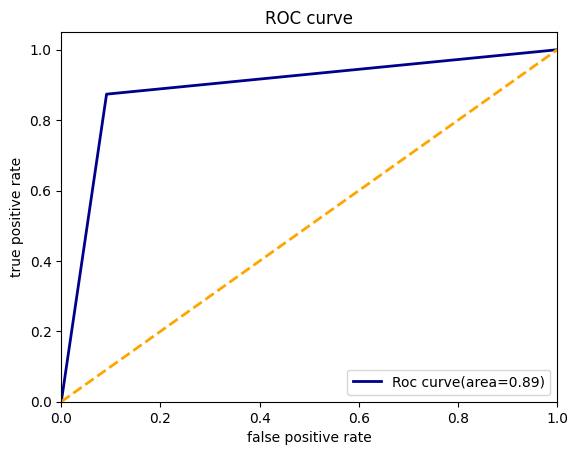

In [222]:
fpr_xgb1_os,tpr_xgb1_os,treshold=roc_curve(y_test_os,y_pred_xgb1_os)
auc_xgb1_os=auc(fpr_xgb1_os,tpr_xgb1_os)
plt.figure()
plt.plot(fpr_xgb1_os,tpr_xgb1_os,color='darkblue',lw=2,label='Roc curve(area=%0.2f)'%auc_xgb1_os)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

In [223]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# Performing undersampling

In [224]:
us=RandomUnderSampler()
x_us,y_us=us.fit_resample(x,y)

In [225]:
y_us.value_counts()

0    2037
1    2037
Name: Exited, dtype: int64

# Scaling the input variables to a same range

In [226]:
mms_us=MinMaxScaler()
x_new_us=mms_os.fit_transform(x_us,y_us)
x_new_us

array([[0.54      , 0.        , 1.        , ..., 1.        , 0.        ,
        0.03110662],
       [0.4       , 0.        , 0.        , ..., 1.        , 1.        ,
        0.95938512],
       [0.772     , 0.        , 0.        , ..., 1.        , 0.        ,
        0.17086007],
       ...,
       [0.494     , 0.        , 0.        , ..., 1.        , 0.        ,
        0.34689878],
       [0.718     , 0.        , 0.        , ..., 0.        , 1.        ,
        0.21039009],
       [0.844     , 0.5       , 1.        , ..., 1.        , 0.        ,
        0.46442905]])

# Splitting the dataset into train and test datas

In [227]:
x_train_us,x_test_us,y_train_us,y_test_us=train_test_split(x_new_us,y_us,random_state=1,test_size=0.3)
x_train_us.shape,x_test_us.shape,y_train_us.shape,y_test_us.shape

((2851, 10), (1223, 10), (2851,), (1223,))

# Performing classification algorithms without hyperparameter tuning

Accuracy= 68.43826655764514
              precision    recall  f1-score   support

           0       0.68      0.73      0.70       622
           1       0.69      0.64      0.67       601

    accuracy                           0.68      1223
   macro avg       0.69      0.68      0.68      1223
weighted avg       0.69      0.68      0.68      1223

ROC-AUC Score 68.36154640443847


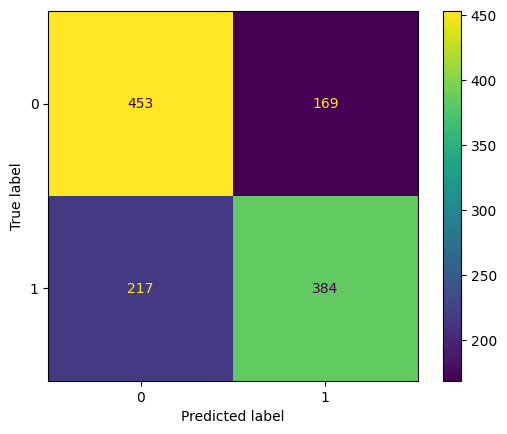

In [228]:
knn_us=KNeighborsClassifier(n_neighbors=5)
knn_us.fit(x_train_us,y_train_us)
y_pred_knn_us=knn_us.predict(x_test_us)
print("Accuracy=", accuracy_score(y_test_us,y_pred_knn_us)*100)
print(classification_report(y_test_us,y_pred_knn_us))
print(ConfusionMatrixDisplay.from_predictions(y_test_us,y_pred_knn_us))
print("ROC-AUC Score", roc_auc_score(y_test_us,y_pred_knn_us)*100)

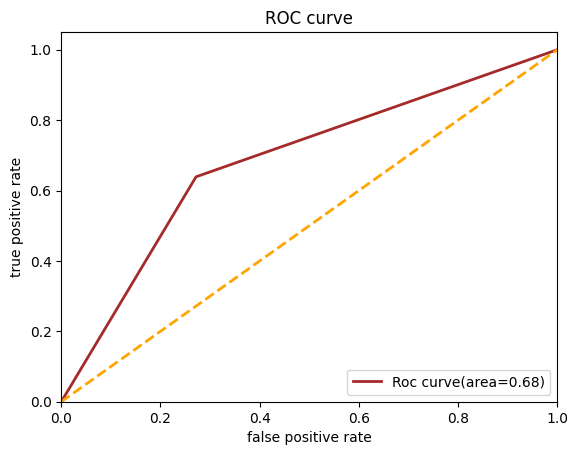

In [229]:
fpr_knn_us,tpr_knn_us,treshold=roc_curve(y_test_us,y_pred_knn_us)
auc_knn_us=auc(fpr_knn_us,tpr_knn_us)
plt.figure()
lw=2
plt.plot(fpr_knn_us,tpr_knn_us,color='brown',lw=lw,label='Roc curve(area=%0.2f)' %auc_knn_us)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 74.40719542109566
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       622
           1       0.75      0.71      0.73       601

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223

ROC-AUC Score 74.35049301539236


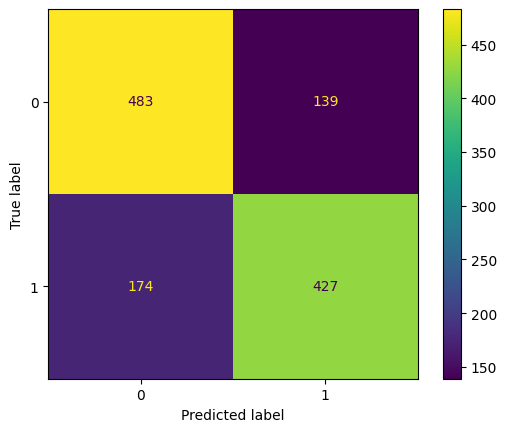

In [230]:
sv_us=SVC(kernel='rbf')
sv_us.fit(x_train_us,y_train_us)
y_pred_sv_us=sv_us.predict(x_test_us)
print("Accuracy=", accuracy_score(y_test_us,y_pred_sv_us)*100)
print(classification_report(y_test_us,y_pred_sv_us))
print(ConfusionMatrixDisplay.from_predictions(y_test_us,y_pred_sv_us))
print("ROC-AUC Score", roc_auc_score(y_test_us,y_pred_sv_us)*100)

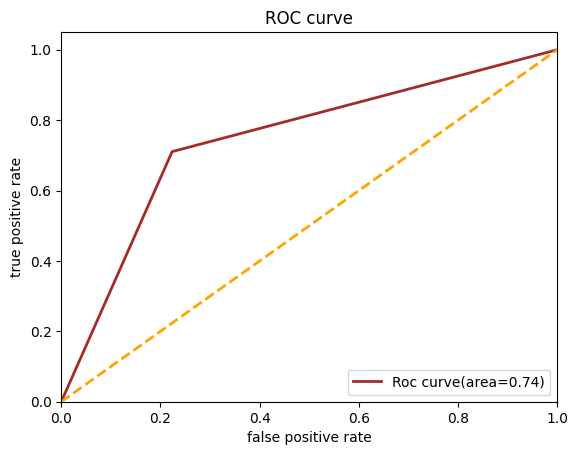

In [231]:
fpr_sv_us,tpr_sv_us,treshold=roc_curve(y_test_us,y_pred_sv_us)
auc_sv_us=auc(fpr_sv_us,tpr_sv_us)
plt.figure()
lw=2
plt.plot(fpr_sv_us,tpr_sv_us,color='brown',lw=lw,label='Roc curve(area=%0.2f)' %auc_sv_us)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 72.03597710547834
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       622
           1       0.72      0.70      0.71       601

    accuracy                           0.72      1223
   macro avg       0.72      0.72      0.72      1223
weighted avg       0.72      0.72      0.72      1223

ROC-AUC Score 71.99683271717555


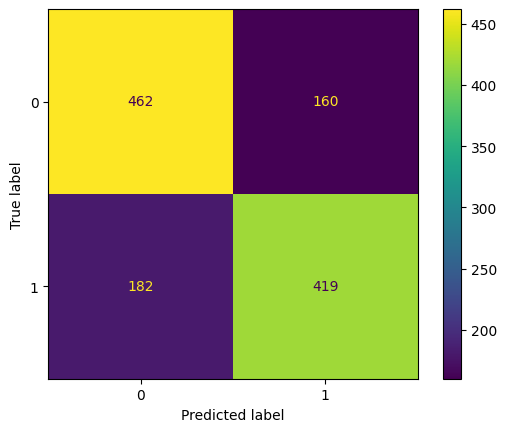

In [232]:
gnb_us=GaussianNB()
gnb_us.fit(x_train_us,y_train_us)
y_pred_gnb_us=gnb_us.predict(x_test_us)
print("Accuracy=", accuracy_score(y_test_us,y_pred_gnb_us)*100)
print(classification_report(y_test_us,y_pred_gnb_us))
print(ConfusionMatrixDisplay.from_predictions(y_test_us,y_pred_gnb_us))
print("ROC-AUC Score", roc_auc_score(y_test_us,y_pred_gnb_us)*100)

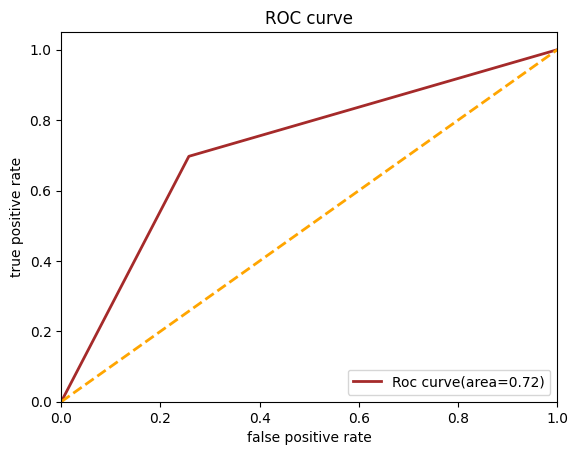

In [233]:
fpr_gnb_us,tpr_gnb_us,treshold=roc_curve(y_test_us,y_pred_gnb_us)
auc_gnb_us=auc(fpr_gnb_us,tpr_gnb_us)
plt.figure()
lw=2
plt.plot(fpr_gnb_us,tpr_gnb_us,color='brown',lw=lw,label='Roc curve(area=%0.2f)' %auc_gnb_us)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 73.58953393295175
              precision    recall  f1-score   support

           0       0.70      0.83      0.76       622
           1       0.79      0.63      0.70       601

    accuracy                           0.74      1223
   macro avg       0.74      0.73      0.73      1223
weighted avg       0.74      0.74      0.73      1223

ROC-AUC Score 73.41742861575831


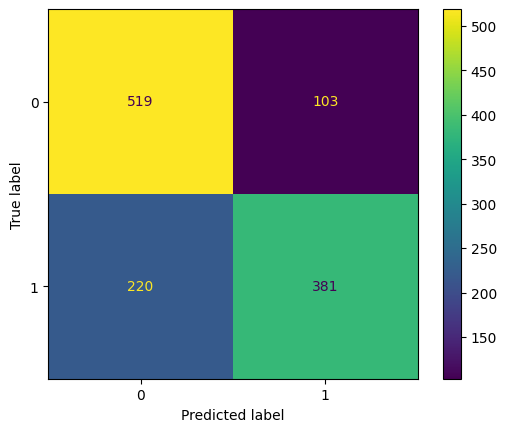

In [234]:
dtc_us=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=4)
dtc_us.fit(x_train_us,y_train_us)
y_pred_dtc_us=dtc_us.predict(x_test_us)
print("Accuracy=", accuracy_score(y_test_us,y_pred_dtc_us)*100)
print(classification_report(y_test_us,y_pred_dtc_us))
print(ConfusionMatrixDisplay.from_predictions(y_test_us,y_pred_dtc_us))
print("ROC-AUC Score", roc_auc_score(y_test_us,y_pred_dtc_us)*100)

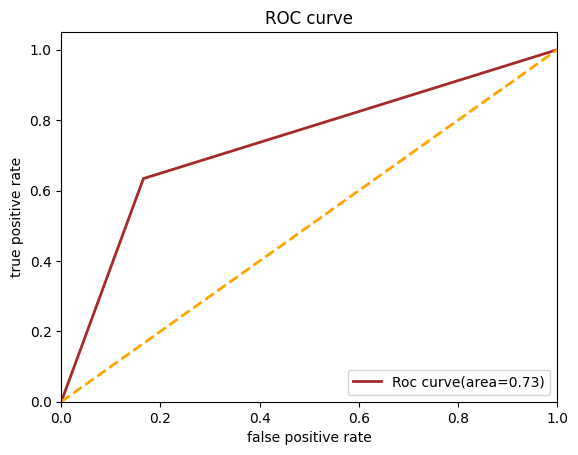

In [235]:
fpr_dtc_us,tpr_dtc_us,treshold=roc_curve(y_test_us,y_pred_dtc_us)
auc_dtc_us=auc(fpr_dtc_us,tpr_dtc_us)
plt.figure()
lw=2
plt.plot(fpr_dtc_us,tpr_dtc_us,color='brown',lw=lw,label='Roc curve(area=%0.2f)' %auc_dtc_us)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 75.06132461161079
              precision    recall  f1-score   support

           0       0.73      0.80      0.77       622
           1       0.77      0.70      0.73       601

    accuracy                           0.75      1223
   macro avg       0.75      0.75      0.75      1223
weighted avg       0.75      0.75      0.75      1223

ROC-AUC Score 74.97672689140822


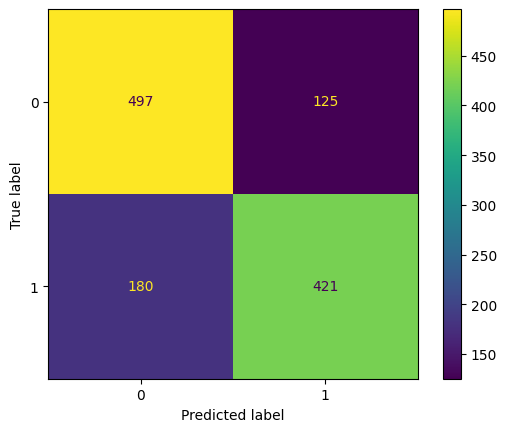

In [236]:
rfc_us=RandomForestClassifier(n_estimators=200,random_state=1,criterion='entropy',max_depth=4)
rfc_us.fit(x_train_us,y_train_us)
y_pred_rfc_us=rfc_us.predict(x_test_us)
print("Accuracy=", accuracy_score(y_test_us,y_pred_rfc_us)*100)
print(classification_report(y_test_us,y_pred_rfc_us))
print(ConfusionMatrixDisplay.from_predictions(y_test_us,y_pred_rfc_us))
print("ROC-AUC Score", roc_auc_score(y_test_us,y_pred_rfc_us)*100)

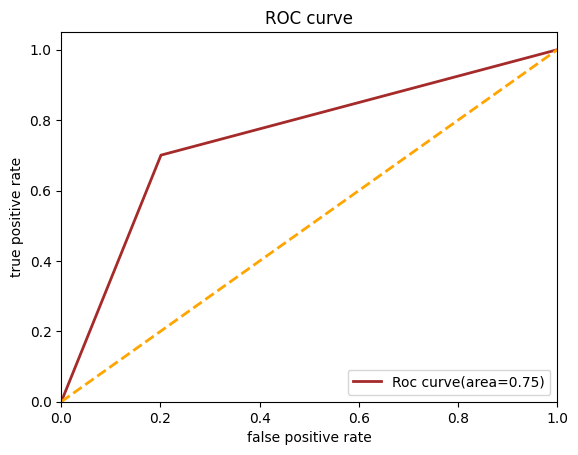

In [237]:
fpr_rfc_us,tpr_rfc_us,treshold=roc_curve(y_test_us,y_pred_rfc_us)
auc_rfc_us=auc(fpr_rfc_us,tpr_rfc_us)
plt.figure()
lw=2
plt.plot(fpr_rfc_us,tpr_rfc_us,color='brown',lw=lw,label='Roc curve(area=%0.2f)' %auc_rfc_us)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 77.18724448078495
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       622
           1       0.78      0.75      0.76       601

    accuracy                           0.77      1223
   macro avg       0.77      0.77      0.77      1223
weighted avg       0.77      0.77      0.77      1223

ROC-AUC Score 77.15383257272177


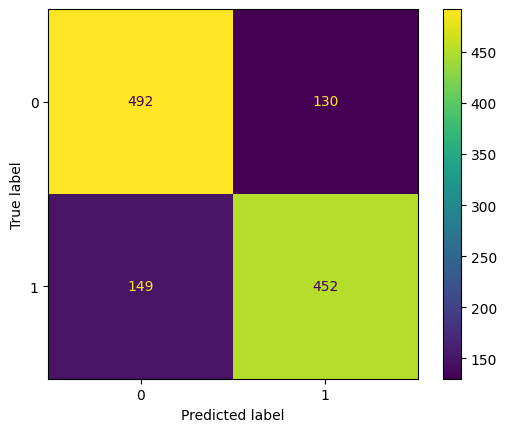

In [238]:
ad_us=AdaBoostClassifier(n_estimators=50,random_state=1)
ad_us.fit(x_train_us,y_train_us)
y_pred_ad_us=ad_us.predict(x_test_us)
print("Accuracy=", accuracy_score(y_test_us,y_pred_ad_us)*100)
print(classification_report(y_test_us,y_pred_ad_us))
print(ConfusionMatrixDisplay.from_predictions(y_test_us,y_pred_ad_us))
print("ROC-AUC Score", roc_auc_score(y_test_us,y_pred_ad_us)*100)

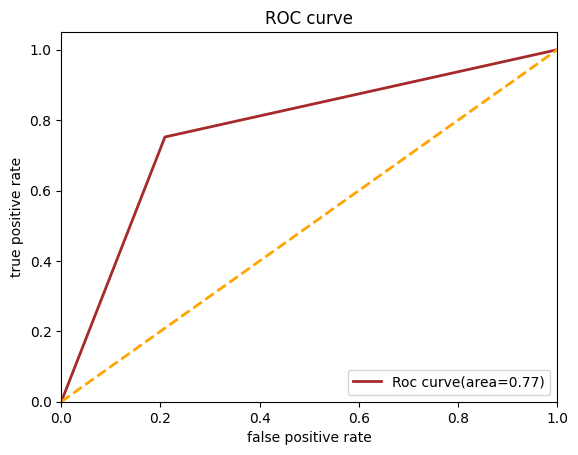

In [239]:
fpr_ad_us,tpr_ad_us,treshold=roc_curve(y_test_us,y_pred_ad_us)
auc_ad_us=auc(fpr_ad_us,tpr_ad_us)
plt.figure()
lw=2
plt.plot(fpr_ad_us,tpr_ad_us,color='brown',lw=lw,label='Roc curve(area=%0.2f)' %auc_ad_us)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 77.5960752248569
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       622
           1       0.77      0.77      0.77       601

    accuracy                           0.78      1223
   macro avg       0.78      0.78      0.78      1223
weighted avg       0.78      0.78      0.78      1223

ROC-AUC Score 77.58946771458073


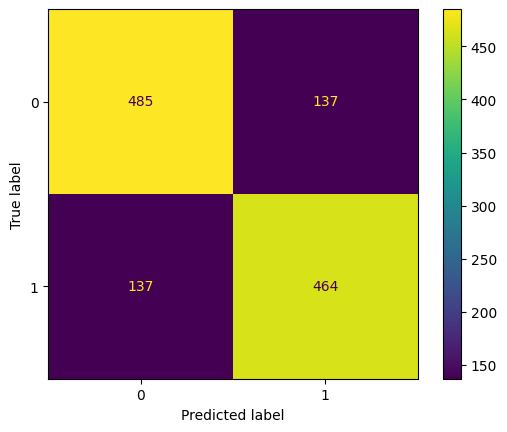

In [240]:
xgb_us=XGBClassifier(n_estimators=50,random_state=1)
xgb_us.fit(x_train_us,y_train_us)
y_pred_xgb_us=xgb_us.predict(x_test_us)
print("Accuracy=", accuracy_score(y_test_us,y_pred_xgb_us)*100)
print(classification_report(y_test_us,y_pred_xgb_us))
print(ConfusionMatrixDisplay.from_predictions(y_test_us,y_pred_xgb_us))
print("ROC-AUC Score", roc_auc_score(y_test_us,y_pred_xgb_us)*100)

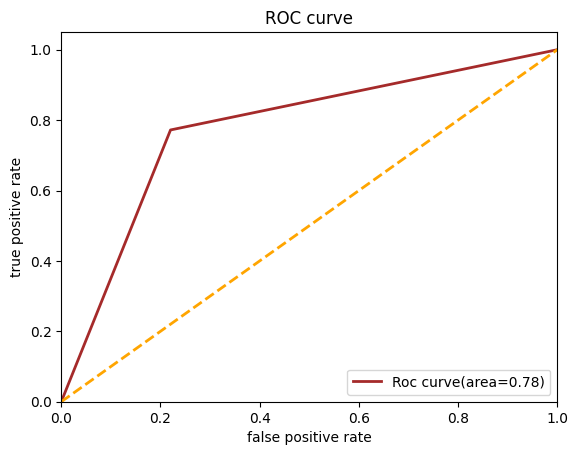

In [241]:
fpr_xgb_us,tpr_xgb_us,treshold=roc_curve(y_test_us,y_pred_xgb_us)
auc_xgb_us=auc(fpr_xgb_us,tpr_xgb_us)
plt.figure()
lw=2
plt.plot(fpr_xgb_us,tpr_xgb_us,color='brown',lw=lw,label='Roc curve(area=%0.2f)' %auc_xgb_us)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

# Hyperparameter Tuning

In [242]:
params_knn_us={'n_neighbors':[3,5,7,9],
            'weights':['uniform','distance'],
            'algorithm':['auto','ball_tree','kd_tree','brute']}
clf_knn_us=GridSearchCV(knn_us,params_knn_us,cv=5,scoring='accuracy')
clf_knn_us.fit(x_train_us,y_train_us)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [243]:
params_sv_us={'kernel':['poly','linear','rbf'],
           'gamma':['scale','auto'],
           'decision_function_shape':['ovo','ovr']}
clf_sv_us=GridSearchCV(sv_us,params_sv_us,cv=5,scoring='accuracy')
clf_sv_us.fit(x_train_us,y_train_us)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'linear', 'rbf']},
             scoring='accuracy')

In [244]:
params_dtc_us={'criterion':['gini','entropy','log_loss'],
            'splitter':['best','random'],
            'max_depth':[4,5,6,7,8,9,10]}
clf_dtc_us=GridSearchCV(dtc_us,params_dtc_us,cv=5,scoring='accuracy')
clf_dtc_us.fit(x_train_us,y_train_us)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                              random_state=1),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [245]:
params_rfc_us={'n_estimators':[50,100,150,200],
            'max_features':['sqrt','log2'],
            'class_weight':['balanced','balanced_subsample']}
clf_rfc_us = GridSearchCV(rfc_us, params_rfc_us, cv=5, scoring='accuracy')
clf_rfc_us.fit(x_train_us, y_train_us)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=4,
                                              n_estimators=200,
                                              random_state=1),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [246]:
params_ad_us={'n_estimators': [50, 100, 200],
           'random_state':[1,2,3,4,5,6,7,8,9,10]}
clf_ad_us=GridSearchCV(ad_us,params_ad_us,cv=5,scoring='accuracy')
clf_ad_us.fit(x_train_us,y_train_us)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1),
             param_grid={'n_estimators': [50, 100, 200],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [247]:
params_xgb_us={'n_estimators':[50,100,200],
            'random_state':[1,2,3,4,5,6,7,8,9,10]}
clf_xgb_us=GridSearchCV(xgb_us,params_xgb_us,cv=5,scoring='accuracy')
clf_xgb_us.fit(x_train_us,y_train_us)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...one,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=50,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1, ...),
             param_grid={'n_estimators': [50, 100, 200],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

**Displaying the best parameters**

In [248]:
print("Best Parameters:")
print("KNeighbours Classifier:",clf_knn_us.best_params_)
print("SVC:",clf_sv_us.best_params_)
print("DecisionTree Classifier:",clf_dtc_us.best_params_)
print("Random Forest Classifier:",clf_rfc_us.best_params_)
print("AdaBoost Classifier:",clf_ad_us.best_params_)
print("XGB Classifier:",clf_xgb_us.best_params_)

Best Parameters:
KNeighbours Classifier: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}
SVC: {'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'poly'}
DecisionTree Classifier: {'criterion': 'entropy', 'max_depth': 7, 'splitter': 'random'}
Random Forest Classifier: {'class_weight': 'balanced_subsample', 'max_features': 'sqrt', 'n_estimators': 100}
AdaBoost Classifier: {'n_estimators': 100, 'random_state': 1}
XGB Classifier: {'n_estimators': 50, 'random_state': 1}


# Performing classification algorithms without hyperparameter tuning

Accuracy= 69.91005723630417
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       622
           1       0.71      0.66      0.68       601

    accuracy                           0.70      1223
   macro avg       0.70      0.70      0.70      1223
weighted avg       0.70      0.70      0.70      1223

ROC-AUC Score 69.84500644691857


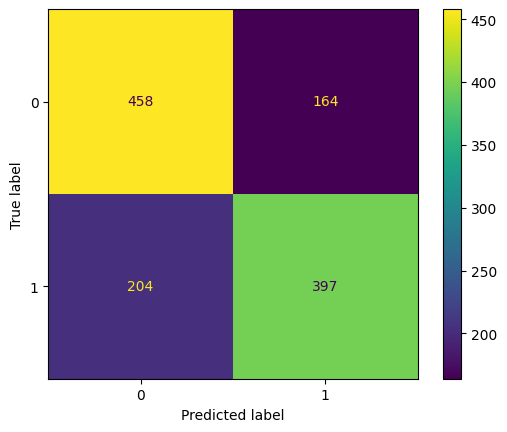

In [249]:
knn1_us=KNeighborsClassifier(algorithm='auto',n_neighbors=9,weights='distance')
knn1_us.fit(x_train_us,y_train_us)
y_pred_knn1_us=knn1_us.predict(x_test_us)
print("Accuracy=", accuracy_score(y_test_us,y_pred_knn1_us)*100)
print(classification_report(y_test_us,y_pred_knn1_us))
print(ConfusionMatrixDisplay.from_predictions(y_test_us,y_pred_knn1_us))
print("ROC-AUC Score", roc_auc_score(y_test_us,y_pred_knn1_us)*100)

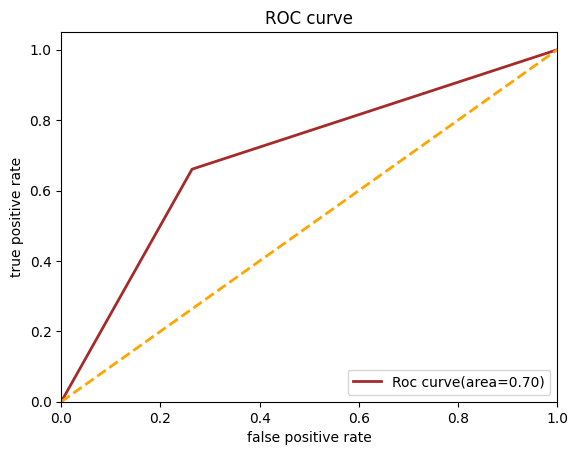

In [250]:
fpr_knn1_us,tpr_knn1_us,treshold=roc_curve(y_test_us,y_pred_knn1_us)
auc_knn1_us=auc(fpr_knn1_us,tpr_knn1_us)
plt.figure()
lw=2
plt.plot(fpr_knn1_us,tpr_knn1_us,color='brown',lw=lw,label='Roc curve(area=%0.2f)' %auc_knn1_us)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 74.57072771872446
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       622
           1       0.74      0.74      0.74       601

    accuracy                           0.75      1223
   macro avg       0.75      0.75      0.75      1223
weighted avg       0.75      0.75      0.75      1223

ROC-AUC Score 74.55620589478414


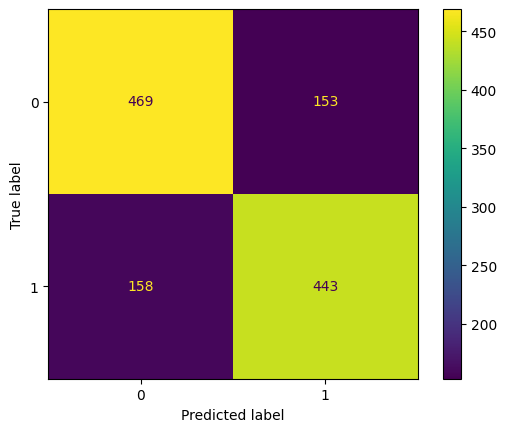

In [251]:
sv1_us=SVC(decision_function_shape='ovo',gamma='scale',kernel='poly')
sv1_us.fit(x_train_us,y_train_us)
y_pred_sv1_us=sv1_us.predict(x_test_us)
print("Accuracy=", accuracy_score(y_test_us,y_pred_sv1_us)*100)
print(classification_report(y_test_us,y_pred_sv1_us))
print(ConfusionMatrixDisplay.from_predictions(y_test_us,y_pred_sv1_us))
print("ROC-AUC Score", roc_auc_score(y_test_us,y_pred_sv1_us)*100)

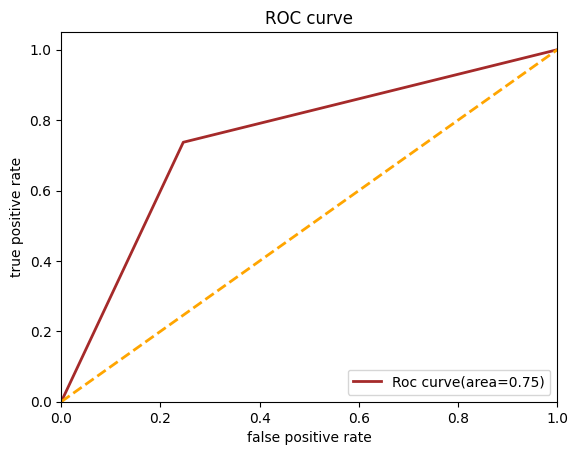

In [252]:
fpr_sv1_us,tpr_sv1_us,treshold=roc_curve(y_test_us,y_pred_sv1_us)
auc_sv1_us=auc(fpr_sv1_us,tpr_sv1_us)
plt.figure()
lw=2
plt.plot(fpr_sv1_us,tpr_sv1_us,color='brown',lw=lw,label='Roc curve(area=%0.2f)' %auc_sv1_us)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 77.10547833197057
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       622
           1       0.78      0.75      0.76       601

    accuracy                           0.77      1223
   macro avg       0.77      0.77      0.77      1223
weighted avg       0.77      0.77      0.77      1223

ROC-AUC Score 77.06221142682881


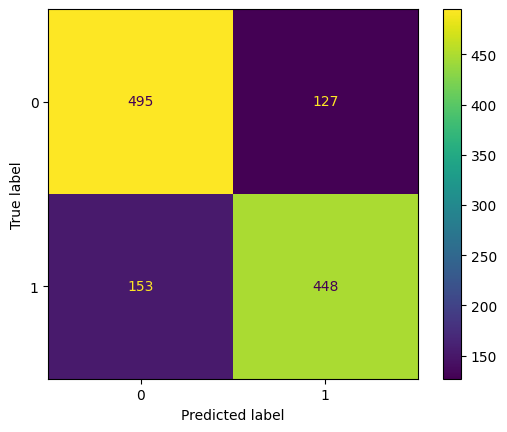

In [253]:
dtc1_us=DecisionTreeClassifier(criterion='gini',max_depth=6,splitter='best')
dtc1_us.fit(x_train_us,y_train_us)
y_pred_dtc1_us=dtc1_us.predict(x_test_us)
print("Accuracy=", accuracy_score(y_test_us,y_pred_dtc1_us)*100)
print(classification_report(y_test_us,y_pred_dtc1_us))
print(ConfusionMatrixDisplay.from_predictions(y_test_us,y_pred_dtc1_us))
print("ROC-AUC Score", roc_auc_score(y_test_us,y_pred_dtc1_us)*100)

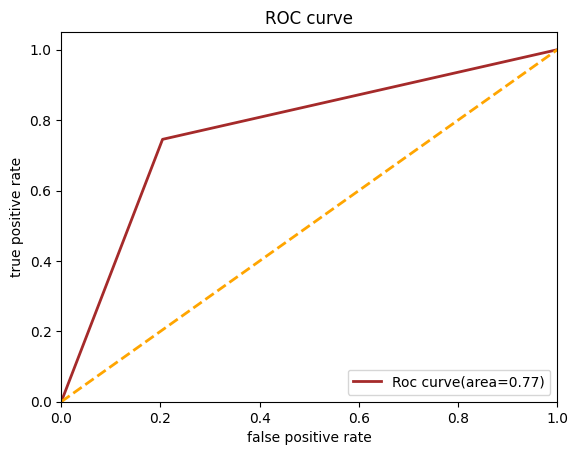

In [254]:
fpr_dtc1_us,tpr_dtc1_us,treshold=roc_curve(y_test_us,y_pred_dtc1_us)
auc_dtc1_us=auc(fpr_dtc1_us,tpr_dtc1_us)
plt.figure()
lw=2
plt.plot(fpr_dtc1_us,tpr_dtc1_us,color='brown',lw=lw,label='Roc curve(area=%0.2f)' %auc_dtc1_us)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 76.28781684382666
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       622
           1       0.76      0.75      0.76       601

    accuracy                           0.76      1223
   macro avg       0.76      0.76      0.76      1223
weighted avg       0.76      0.76      0.76      1223

ROC-AUC Score 76.26958819973142


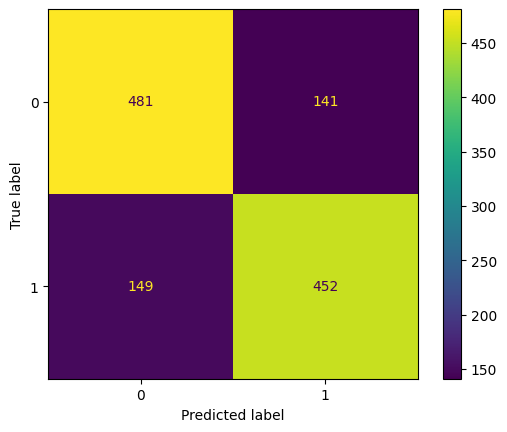

In [255]:
rfc1_us=RandomForestClassifier(class_weight='balanced_subsample',max_features='sqrt',n_estimators=100,random_state=1)
rfc1_us.fit(x_train_us,y_train_us)
y_pred_rfc1_us=rfc1_us.predict(x_test_us)
print("Accuracy=", accuracy_score(y_test_us,y_pred_rfc1_us)*100)
print(classification_report(y_test_us,y_pred_rfc1_us))
print(ConfusionMatrixDisplay.from_predictions(y_test_us,y_pred_rfc1_us))
print("ROC-AUC Score", roc_auc_score(y_test_us,y_pred_rfc1_us)*100)

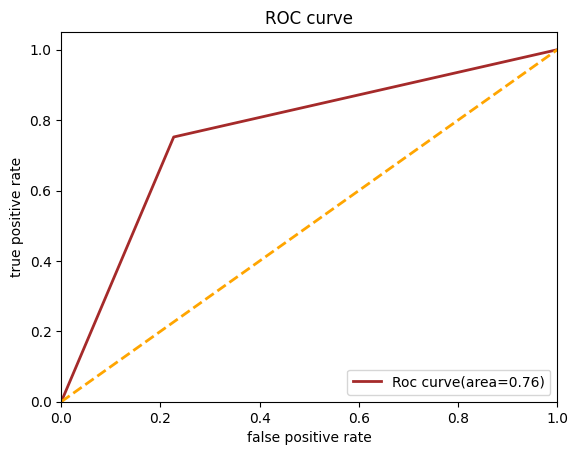

In [256]:
fpr_rfc1_us,tpr_rfc1_us,treshold=roc_curve(y_test_us,y_pred_rfc1_us)
auc_rfc1_us=auc(fpr_rfc1_us,tpr_rfc1_us)
plt.figure()
lw=2
plt.plot(fpr_rfc1_us,tpr_rfc1_us,color='brown',lw=lw,label='Roc curve(area=%0.2f)' %auc_rfc1_us)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

In [257]:
# The best model is XGBClassifier with n_estimators=50, random_state=1
# using oversampling
# Accuracy=89.07492674759312

# Saving the model of XGBoost Classifier model(with oversampling) and its scaler

In [258]:
pickle.dump(xgb1_os,open('model_bank.sav','wb'))
pickle.dump(mms_os,open('scaler_bank.sav','wb'))